**Problem Statement:
Rain Prediction –Weather forecasting
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:**

**1. Problem Statement:**
**a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.**

**Dataset Description:**
**Number of columns: 23
Date  - The date of observationLocation  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".**

In [833]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [834]:
#loading dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [835]:
pd.set_option('display.max_columns',None)

In [836]:
#checking overview
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [837]:
#checking shape
data.shape

(8425, 23)

**So we can see that there  are 8425 column and 23 rows in the dataset.**

In [838]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

**So in this we can see that there are about 16 float type data columns and 7 integer type data columns.**

In [839]:
#checking for columns
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**In this we can see the names of the columns which is there in the dataset.**

In [840]:
#checking for duplicates
data.duplicated().sum()

1663

**So we can see that there are about  duplicates in the dataset.So dropping all the duplicates.**

In [841]:
#dropping all the duplicates
data.drop_duplicates(inplace=True)
data.shape

(6762, 23)

**So we can see that all the duplicates have been dropped.**

In [842]:
#checking for null values
data.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

**So we can see that Except columns Date and Location rest all the columns have null values.**

In [843]:
#checking for unique values
data['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2013-06-06',
       '2013-06-07', '2013-06-08'], dtype=object)

**This column gives us the information about the date of observation.**

In [844]:
#checking for unique values
data['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

**This column gives us the information about the common name of the location of the weather station.**

In [845]:
#checking for unique values
data['MinTemp'].unique()

array([13.4,  7.4, 12.9,  9.2, 17.5, 14.6, 14.3,  7.7,  9.7, 13.1, 15.9,
       12.6,  8.4,  9.8, 14.1, 13.5, 11.2, 11.5, 17.1, 20.5, 15.3, 16.2,
       16.9, 20.1, 19.7, 12.5, 12. , 11.3,  9.6, 10.5, 12.3, 13.7, 16.1,
       14. , 17. , 17.3, 17.2, 17.4, 19.8, 14.9, 13.9, 18.6, 19.3, 24.4,
       18.8, 20.8, 15.7, 18.5, 20.4, 21.8, 22.3, 22. , 28. , 21.5, 21.7,
       23.5, 28.3, 18.4, 12.4, 13.3, 18. , 18.7, 15.5,  8.9, 15. , 15.4,
       16. , 12.8, 13.2, 13.8,  7.6,  8.3, 11. , 20.9, 16.4, 10. ,  8.8,
        9.3, 14.4, 10.8, 10.1,  9.1, 10.4, 12.2, 10.7,  7.8,  8.1,  7.5,
        8.2, 11.6, 13. ,  9.9,  3.5,  6.6,  7. ,  5.7,  6.2,  6. , 10.6,
        8.6,  4.5,  5.4,  2.1,  1.8,  7.2,  4.6,  4.2,  5.2,  4.1,  3.2,
        4.3,  3.7,  3.6,  6.9, 10.3,  3. ,  2.6,  5.1,  4.4,  4.7,  6.7,
        8. ,  2.2,  1.7,  2.8,  9. ,  6.3, -2. , -1.3,  2. ,  0.5,  1.2,
        0.6,  0.9,  5. ,  3.9,  3.4,  0. , -1.5, -1.7, -0.4,  0.1,  4.8,
        5.9,  2.9, -0.6, -0.3, -1. ,  0.8, -0.1,  1

**This column gives us the information about The minimum temperature in degrees celsius.**

In [846]:
#checking for unique values
data['MaxTemp'].unique()

array([22.9, 25.1, 25.7, 28. , 32.3, 29.7, 25. , 26.7, 31.9, 30.1, 30.4,
       21.7, 18.6, 21. , 24.6, 27.7, 20.9, 22.5, 25.6, 29.3, 33. , 31.8,
       30.9, 32.4, 33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6,
       35.8, 37.9, 38.9, 28.3, 28.4, 30.8, 32. , 34.7, 37.7, 43. , 32.2,
       36.6, 39.9, 38.1, 34. , 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5,
       42.9, 42.7, 43.1, 38.3, 36.9, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3,
       21.6, 29. , 29.2, 31.3, 31.1, 29.1, 31.7, 33.2, 29.6, 32.6, 34.5,
       30.3, 22.1, 22. , 24. , 27.9, 30.2, 30.5, 25.8, 27. , 19.7, 21.9,
       25.3, 33.5, 33.6, 30. , 31.6, 22.3, 29.8, 27.6, 28.9, 29.9, 32.1,
       28.1, 21.4, 24.9, 25.4, 20. , 23.4, 22.7, 16.2, 15.8, 12.9, 11.5,
       14.5, 12.2, 16.5, 17. , 19.2, 18.9, 19.1, 18.8, 19.3, 18.4, 19. ,
       20.5, 19.5, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6, 19.8, 21.1,
       20.3, 18.1, 15.7, 16.8, 17.1, 14.3, 13.4, 17.4, 16.1, 10.5, 11.6,
       12. ,  8.8,  9.6,  8.2, 12.4, 14.9, 15.9, 14

**This column gives us the information about The maximum temperature in degrees celsius.**

In [847]:
#checking for unique values
data['Rainfall'].unique()

array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       1.560e+01, 3.600e+00,       nan, 1.680e+01, 1.060e+01, 1.200e+00,
       8.000e-01, 6.400e+00, 4.000e-01, 3.000e+00, 5.800e+00, 1.160e+01,
       1.800e+00, 8.600e+00, 1.260e+01, 8.400e+00, 6.200e+00, 2.000e+01,
       2.100e+01, 3.200e+00, 4.800e+00, 4.200e+00, 8.000e+00, 1.440e+01,
       4.600e+00, 2.000e+00, 5.600e+00, 1.600e+00, 6.000e+00, 4.400e+00,
       5.400e+00, 5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00, 3.800e+00,
       2.400e+00, 5.200e+00, 6.600e+00, 1.340e+01, 1.020e+01, 2.880e+01,
       7.000e+00, 2.580e+01, 9.400e+00, 1.240e+01, 5.220e+01, 2.060e+01,
       6.600e+01, 1.100e+01, 1.700e+01, 1.040e+01, 2.800e+01, 2.140e+01,
       1.860e+01, 7.200e+00, 8.200e+00, 1.080e+01, 1.540e+01, 9.600e+00,
       4.000e+00, 2.180e+01, 2.080e+01, 2.480e+01, 1.000e+01, 1.140e+01,
       1.900e+01, 2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01,
       1.920e+01, 1.880e+01, 1.480e+01, 1.200e+01, 

**This column gives us the information about The amount of rainfall recorded for the day in mm.**

In [848]:
#checking for unique values
data['Evaporation'].unique()

array([  nan,   8.6,   3.8,   2.8,   3.2,   6.8,   4.2,   1.6,   4.4,
         4. ,   2.2,   3.4,   6.4,   4.6,   3.6,   4.8,   3. ,   1.2,
         1.4,   2.6,   1. ,   2. ,   8.4,   2.4,   0.6,   5.4,   1.8,
         7. ,   0.8,   0.2,   5.2,   5. ,   6. ,   7.6,   5.8,   5.6,
         8. ,   6.2,   6.6,   7.8,   8.8,   7.4,   9.4,   7.2,   0.4,
         0. ,  18. ,  24.2,  14.6,  19.4,  10.8,  28. ,  11.8,  24.6,
        11.2,  22.6,  10. ,  37. ,  26. ,  11. ,  19.8,  24.4,  10.6,
        27.4,  12. ,  11.6,  24. ,   9. ,  23. ,  29.2,  20.6,  13.2,
        22.8,   9.8,  16. ,  20. ,  10.4,   9.6,  12.2,  15.4,  18.4,
        24.8,  20.8,  32. ,  55.4,  17.8,  16.2,  14.2,  59.2,  33.8,
        10.2, 145. ,  16.6,  47. ,  15.2,  15.8,  12.6,  11.4,   9.2,
        14.8,  13. ,   8.2,  13.6,  12.8,  12.4,  17.6,  19.2,  13.8,
        22.4,  18.6,  13.4,  17. ,  14. ,  14.4,  15. ,  15.6,   0.7])

**This column gives us the information about The amount of rainfall recorded for the day in mm.**

In [849]:
#checking for unique values
data['Sunshine'].unique()

array([ nan,  9. ,  3.4,  6.1, 11. ,  7.1,  2.8,  6.7,  6.4,  6. ,  9.4,
        6.3, 11.1, 11.2, 11.4,  9.7,  7.9,  0.3,  0. ,  0.5,  3.5,  1.9,
        1.1,  7.8,  8.8,  1.8,  6.6,  3.1,  3. , 10.4, 10.5,  9.9,  9.5,
        1. ,  4.3,  9.2,  9.8,  4.8,  8.9,  4.5,  2.6, 10. , 10.2,  9.1,
        2.2,  0.4,  0.7,  0.2,  2.7,  8.5,  3.6,  2.5,  6.9,  8.2,  6.8,
        7.2,  9.6,  5.1,  5.8,  1.6,  0.6,  7.7,  8.3,  2.9,  8.4,  4.2,
        9.3,  4.7,  4.1,  5.3,  7.4,  7.3,  2.4, 10.6, 10.3, 10.1,  2.3,
       10.7,  8.6,  5.2, 10.9, 10.8,  8. ,  1.5,  8.7, 11.3, 11.5,  5.7,
       11.9,  3.3, 12.1, 12.4,  7. ,  4. , 11.7, 12.7, 12.5, 12.6, 13. ,
        5.5, 12.2, 11.6, 12.9, 13.1,  5.4,  3.7, 12. ,  2. ,  8.1, 13.2,
       13.6, 12.3, 11.8,  7.5,  6.2,  1.2,  3.8,  1.4,  5. ,  0.8,  4.4,
        6.5,  0.1,  4.9,  3.9,  4.6,  0.9,  5.9,  7.6,  1.3, 12.8, 13.4,
        1.7, 13.3,  3.2,  2.1, 13.5, 13.8, 13.9, 13.7,  5.6])

**This column gives us the information about The number of hours of bright sunshine in the day.**

In [850]:
#checking for unique values
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

**This column gives us the information about The direction of the strongest wind gust in the 24 hours to midnight.**

In [851]:
#checking for unique values
data['WindGustSpeed'].unique()

array([ 44.,  46.,  24.,  41.,  56.,  50.,  35.,  80.,  28.,  30.,  31.,
        61.,  nan,  22.,  63.,  43.,  26.,  33.,  57.,  48.,  39.,  37.,
        52.,  98.,  54.,  83.,  59.,  70.,  69.,  17.,  20.,  19.,  15.,
        13.,  11.,  72.,  85.,  65.,  78., 107.,  74.,  67.,  94.,  76.,
        81.,  87.,   9.,  93.,   7.,  91.,  89., 102., 100.])

**This column gives us the information about The speed (km/h) of the strongest wind gust in the 24 hours to midnight.**

In [852]:
#checking for unique values
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

**This column gives us the information about Direction of the wind at 9am.**

In [853]:
#checking for unique values
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

**This column gives us the information about Direction of the wind at 3pm.**

In [854]:
#checking for unique values
data['WindSpeed9am'].unique()

array([20.,  4., 19., 11.,  7.,  6., 15., 17., 28., 24., nan,  9.,  0.,
       13.,  2., 26., 30., 22., 35., 37., 31., 33., 43., 41., 46., 39.,
       56., 54., 50., 52., 44., 61., 57., 48., 63.])

**This column gives us the information about Wind speed (km/hr) averaged over 10 minutes prior to 9am.**

In [23]:
#checking for unique values
data['WindSpeed3pm'].unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., nan, 37., 46., 39., 50., 35.,
       41., 44., 43., 65., 56., 83., 54., 61., 57., 52.])

**This column gives us the information about Wind speed (km/hr) averaged over 10 minutes prior to 3pm.**

In [306]:
#checking for unique values
data['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  30.,  23.,  nan,  31.,
        22.,  28.,  25.,  16.,  19.,  17.,  18.,  14.,  10.,  12.,  11.,
        24.,  26.,  15.])

**This column gives us the information about Humidity (percent) at 9am.**

In [307]:
#checking for unique values
data['Humidity3pm'].unique()

array([22., 25., 30., 16., 33., 23., 19.,  9., 27., 91., 93., 43., 32.,
       28., 82., 65., 26., 24., 17., 15., 70., 12.,  8., 31., 20., 10.,
       21., 39., 13., 11., 69., 18., 14., 35., 90., 68., 74., 41., 34.,
       78., 49., 37., 42., 47., 52., 29., 86., 89., 62., 79., 48., 46.,
       38., 44., 51., 36., 45., 40., 53., 61., 59., 63., 54., 57., 50.,
       58., 75., 97., 80., 95., 56., 72., 60., 71., 73., 81., 76., 64.,
       87., 85., 67., 55., 77., 84.,  7., 99., 92., 66., 83., 94., 96.,
       88., nan, 98.,  6.])

**This column gives us the information about Humidity (percent) at 3pm.**

In [308]:
#checking for unique values
data['Pressure9am'].unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

**This column gives us the information about Atmospheric pressure (hpa) reduced to mean sea level at 9am.**

In [309]:
#checking for unique values
data['Pressure3pm'].unique()

array([1007.1, 1007.8, 1008.7, 1012.8, 1006. , 1005.4, 1008.2, 1010.1,
       1003.6, 1005.7, 1004.2,  993. , 1001.8, 1010.3, 1010.4, 1002.2,
       1009.7, 1017.1, 1014.8, 1008.1, 1007.6, 1001.7, 1003.4, 1005.1,
       1003.2, 1013.1, 1009.2, 1006.7, 1002.7, 1010.9, 1013.7, 1006.8,
       1012.1, 1006.9, 1012.7, 1017.4, 1016.2, 1010.6, 1004.8, 1005.9,
        997.8, 1003.9, 1014.6, 1014.1, 1011.6, 1011.8, 1010.2, 1010.5,
       1007.4, 1004.7, 1002.6, 1005. , 1003.8, 1006.5, 1008.5, 1011.1,
       1017.3, 1019.7, 1016.4, 1013.8, 1013.5, 1007.5, 1004.5, 1010.8,
       1012.4, 1013.4, 1015. , 1012.6, 1004.6, 1009. , 1012. , 1014.7,
       1015.9, 1018. , 1018.9, 1008. , 1013.2, 1013.9, 1013.6, 1014.4,
       1019.2, 1017.2, 1020.7, 1020.6, 1019.1, 1019.5, 1019.4, 1018.4,
       1012.9, 1019.3, 1016.5, 1019.6, 1023.5, 1023.4, 1017.7, 1020.3,
       1020.8, 1018.7, 1009.8, 1016.8, 1020. , 1020.9, 1021.6, 1015.7,
       1002.4, 1000.9, 1003.3, 1018.3, 1021.5, 1023.2, 1024. , 1025.9,
      

**This column gives us the information about Atmospheric pressure (hpa) reduced to mean sea level at 3pm.**

In [310]:
#checking for unique values
data['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

**This column gives us the information about Fraction of sky obscured by cloud at 9am.**

In [311]:
#checking for unique values
data['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.])

**This column gives us the information about Fraction of sky obscured by cloud at 3pm.**

In [312]:
#checking for unique values
data['Temp9am'].unique()

array([16.9, 17.2, 21. , 18.1, 17.8, 20.6, 16.3, 18.3, 20.1, 20.4, 15.9,
       17.4, 15.8, 17.3, 18. , 15.5, 19.1, 24.5, 23.8, 20.9, 21.5, 23.2,
       26.6, 24.6, 21.6, 12.5, 19.7, 14.9, 17.1, 20.7, 22.4, 23.1, 25.2,
       17.9, 20.2, 22.8, 24.2, 24.3, 25.6, 27.6, 16. , 22. , 26.8, 27.3,
       26.1, 23.3, 21.2, 23.4, 25.8, 28.2, 29. , 29.2, 29.9, 32.4, 28.8,
       27.2, 25.5, 26.5, 28.7, 29.6, 34.5, 18.7, 16.7, 17. , 19.2, 21.4,
       22.1, 19.3, 15. , 20. , 22.2, 23. , 15.6, 13.9, 12.6, 13.3, 17.6,
       18.6, 19. , 19.9, 12.7, 12.2, 12.1, 14.7, 18.8, 15.4, 16.2, 16.5,
       14. , 16.6, 18.4, 12.9, 13.8, 15.1, 16.4, 16.1, 20.5,  9.6, 12.4,
       14.1, 11.2,  9.5,  7.6, 10.1,  8.2,  7.9,  7.2, 10.6, 10.3, 10. ,
        8.3, 11. ,  9.4, 11.7,  8.5,  9.1,  7.5, 13. ,  7. ,  8.8,  7.4,
       11.9, 11.6, 13.6,  7.1, 10.2,  8. ,  9.2, 11.3,  4.7,  6.8,  4.9,
        2.2,  1.9,  5.9,  6.5,  5.4,  6.6,  5.6,  6.9,  8.4,  9.8, 13.5,
        7.8,  2.3,  2.4,  3.3,  3.8,  4.8,  8.1,  9

**This column gives us the information about Temperature (degrees C) at 9am.**

In [313]:
#checking for unique values
data['Temp3pm'].unique()

array([21.8, 24.3, 23.2, 26.5, 29.7, 28.9, 24.6, 25.5, 30.2, 28.2, 28.8,
       17. , 15.8, 19.8, 23.5, 26.2, 18.1, 21.5, 21. , 27.3, 31.6, 30.8,
       29. , 31.2, 33. , 32.1, 26.1, 18.2, 22.7, 25.7, 22.1, 33.9, 34.4,
       36.8, 38.4, 27.6, 26.6, 29.3, 30. , 33.2, 35.7, 41.5, 27.1, 25.8,
       30.5, 37.7, 36.1, 33.1, 36.5, 36.2, 39.2, 40.1, 41.2, 42. , 41.9,
       37.1, 35.2, 39.7, 41.6, 43.4, 38.5, 29.4, 24.9, 17.3, 28.5, 29.2,
       29.5, 27. , 30.7, 32.7, 26.8, 29.8, 31.3, 33.4, 28.6, 33.6, 28.1,
       21.9, 21.4, 22. , 29.6, 18.8, 23.8, 19.7, 18.3, 20.5, 23.9, 27.2,
       32.6, 33.5, 31.4, 19.6, 27.7, 29.9, 30.9, 27.4, 20.3, 21.2, 20.9,
       21.6, 25. , 24.4, 23.1, 18.9, 19.4, 22.9, 23.6, 21.3, 22.3, 22.6,
       15.1, 14.5, 11.6,  9.4, 14. , 12.1, 16.1, 16.3, 19.1, 18.5, 18.4,
       19.2, 20.2, 17.7, 18. , 14.6, 15.3, 15.9, 14.7, 18.7, 21.7, 20.8,
       19.5, 17.4, 15.6, 16.7, 16.8, 13.4, 13. , 16.5, 10.2, 11.5, 11.4,
        7.9,  9.7,  8.8, 15.5, 13.9, 15.4, 14.9, 16

**This column gives us the information about Temperature (degrees C) at 3pm.**

In [314]:
#checking for unique values
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

**This column gives us the information about whether it will be raining on that particular day or not, and it is calculated by Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.**

In [315]:
data['RainToday'].value_counts()

No     5052
Yes    1572
Name: RainToday, dtype: int64

In [316]:
#checking for unique values
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

**This column gives us the information about the amount of next day rain in mm.**

In [317]:
#checking for number of unique values
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

**So we can see the number of unique values preseent in the columns.**

PerthAirport    1204
Albury           889
Newcastle        804
Melbourne        721
CoffsHarbour     609
Brisbane         569
Williamtown      568
Penrith          476
Darwin           250
Wollongong       232
Adelaide         198
Uluru             38
Name: Location, dtype: int64


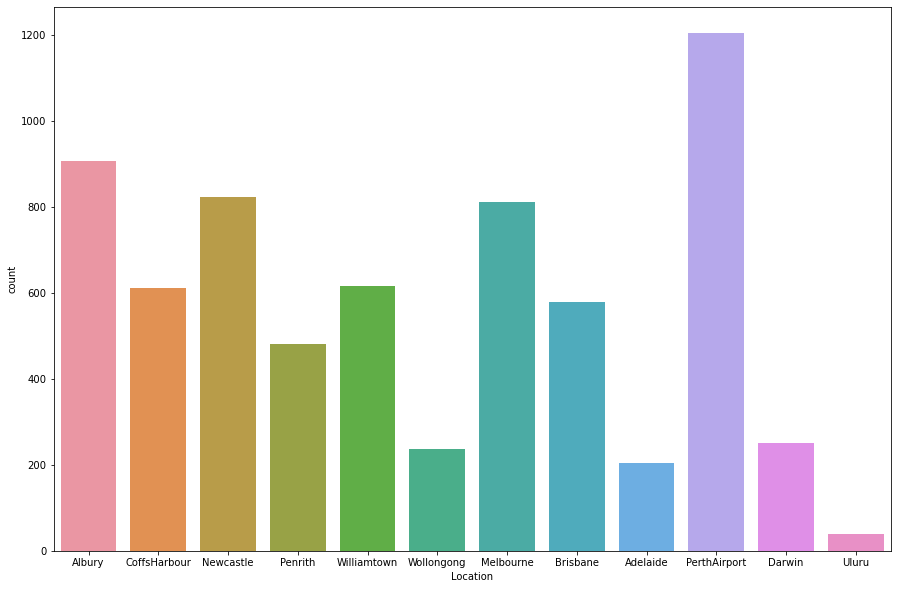

In [320]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='Location',data=data)
print(data1['Location'].value_counts())
plt.show()

**In this plot we can see that most of the times observation was taken or present in this dataset is  from waether station PerthaAirport and least observation were taken or present in this dataset is from weather station Uluru.**

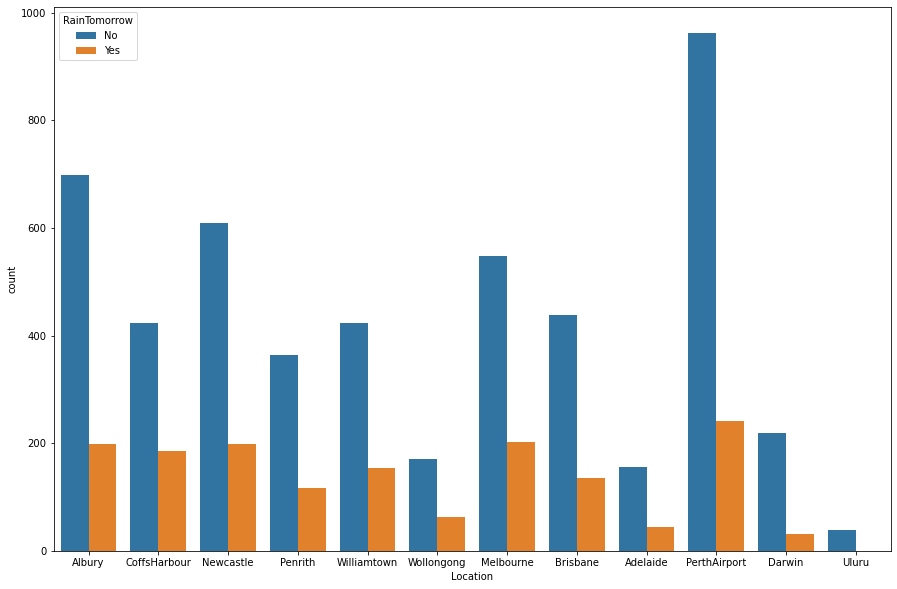

In [321]:
#plotting countplot
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='Location',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that most of the times there wont be any rainfall tomorrow in the above mention weather stations.**

E      1205
N       649
SW      452
W       423
WSW     406
WNW     387
SSE     370
SE      362
S       354
ENE     347
NE      296
SSW     291
NW      288
NNE     283
ESE     264
NNW     181
Name: WindGustDir, dtype: int64


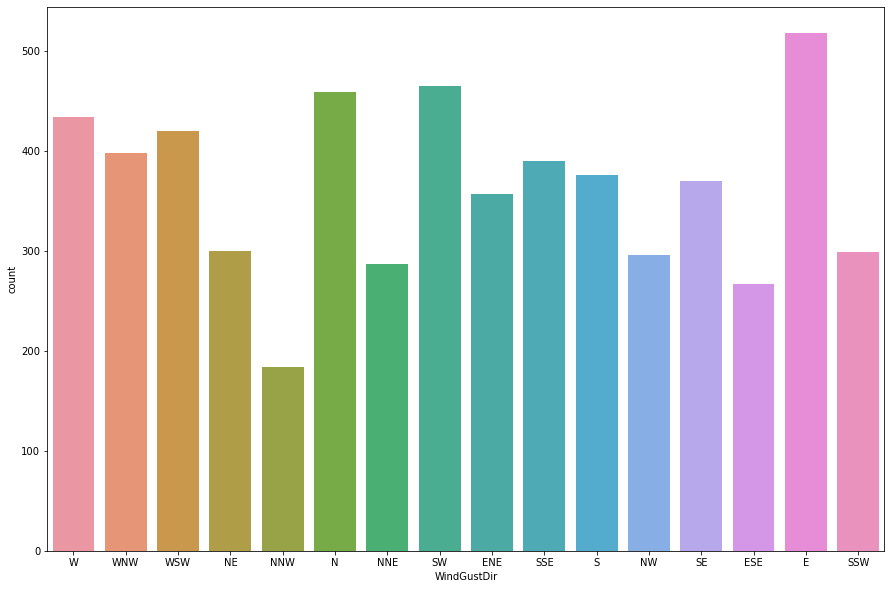

In [322]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='WindGustDir',data=data)
print(data1['WindGustDir'].value_counts())
plt.show()

**In this plot we can see that most of the times the strongest wind gust was in East direction.**

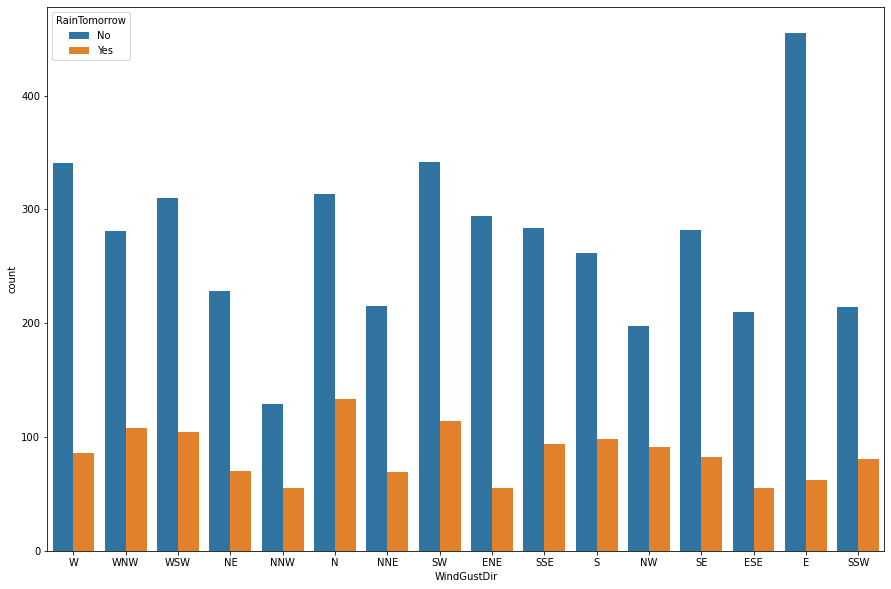

In [323]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='WindGustDir',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that most of the times when the wind gust direction is in East direction there wont be any rain tomorrow and most of the times when the wind gust direction is in east there  will be a rain tommorow.**

SW     1174
N       746
NW      450
SE      429
ENE     392
WSW     377
SSW     359
NE      356
E       332
NNE     329
S       310
SSE     292
WNW     292
W       290
ESE     224
NNW     206
Name: WindDir9am, dtype: int64


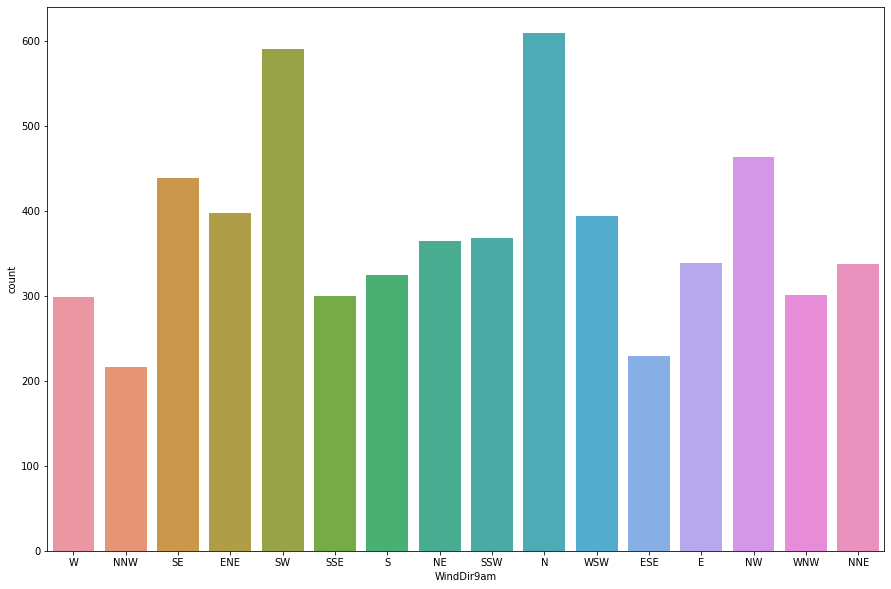

In [324]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='WindDir9am',data=data)
print(data1['WindDir9am'].value_counts())
plt.show()

**In this plot we can see that most of the times wind direction at 9am was in SouthWest direction.**

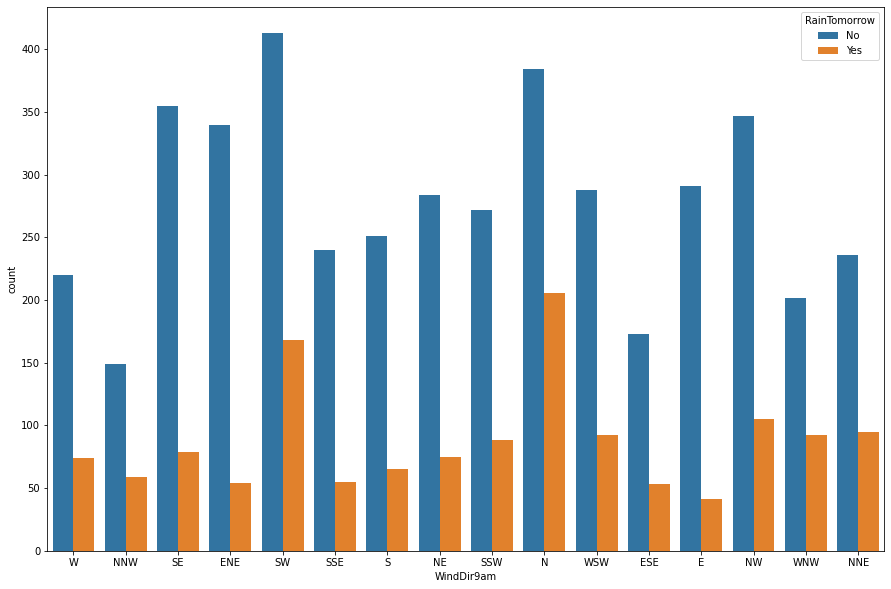

In [325]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='WindDir9am',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that when the wind direction at 9am is in southwest direction most of the times there is no possibility of rainfall tommorow and when the wind direction at 9am is in North most of the times it will rain tomorrow.And also there are equal chances of no rain tomorrow also in that direction.**

SE     938
WSW    487
NE     477
S      460
SW     416
SSE    408
NW     395
W      390
E      378
WNW    376
ESE    356
N      344
ENE    333
NNE    300
SSW    267
NNW    233
Name: WindDir3pm, dtype: int64


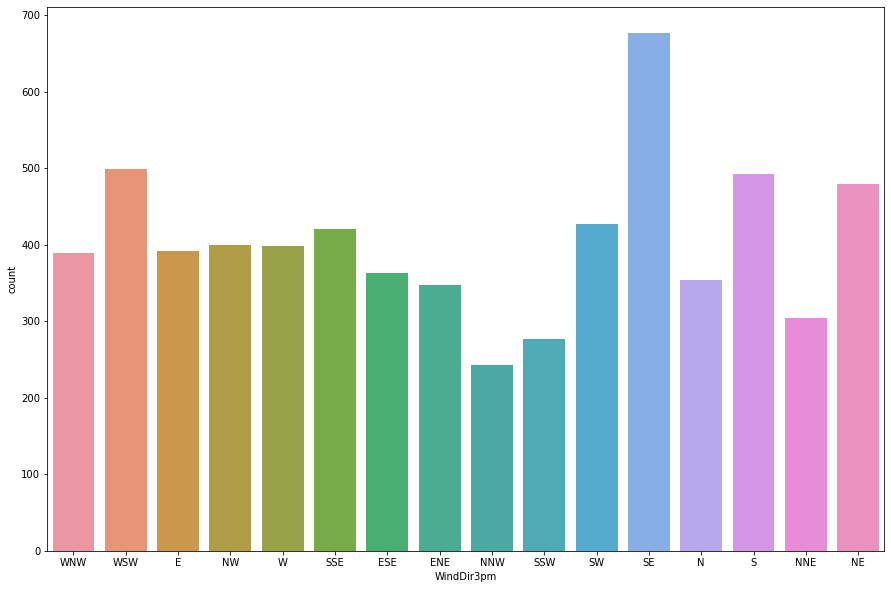

In [326]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='WindDir3pm',data=data)
print(data1['WindDir3pm'].value_counts())
plt.show()

**In this plot we can see that most of the times wind direction at 3pm was in SouthEast direction.**

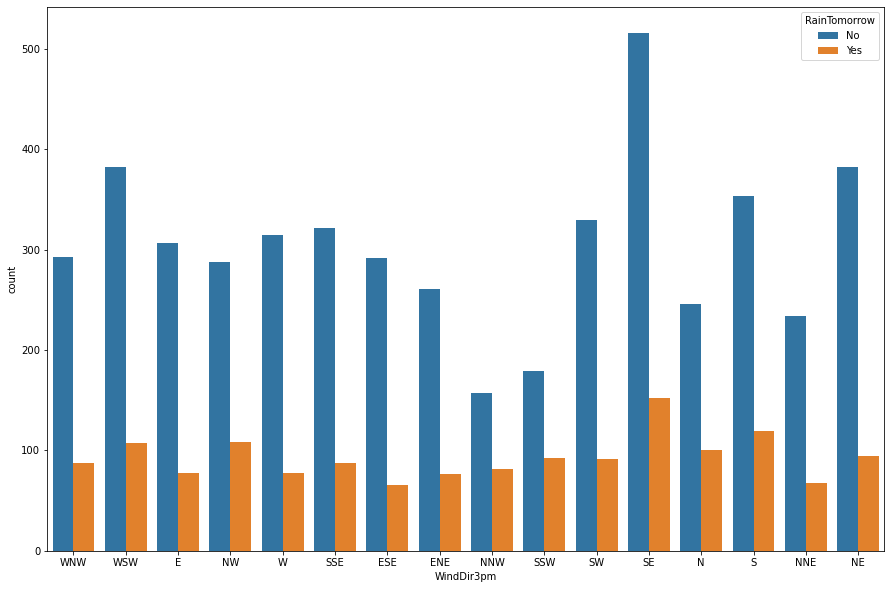

In [327]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='WindDir3pm',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that when the wind direction at 3am is in southEast direction most of the times there is no possibility of rainfall tommorow.**

No     5005
Yes    1553
Name: RainToday, dtype: int64


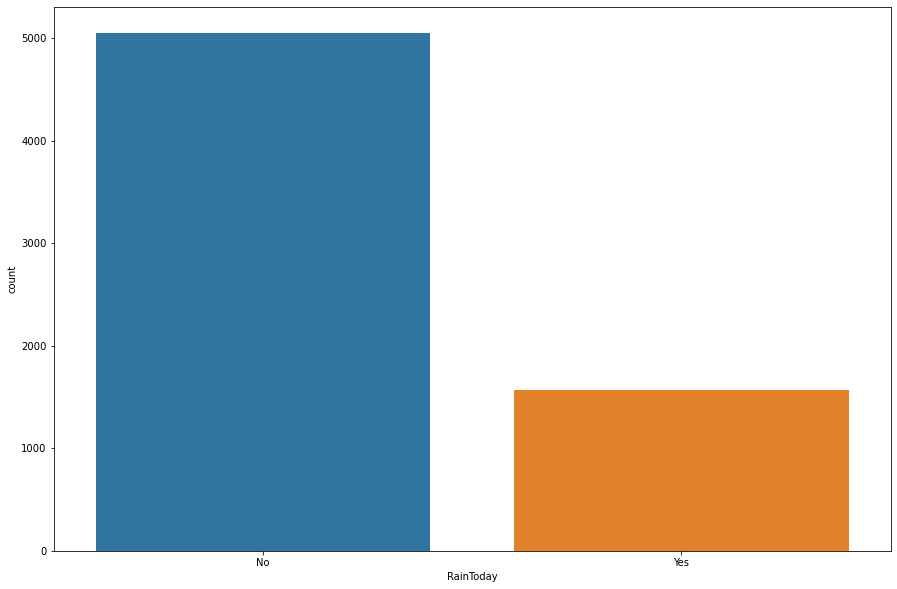

In [328]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='RainToday',data=data)
print(data1['RainToday'].value_counts())
plt.show()

**In this plot we can see that most of the times it was observed on a given particulater dates there was no rain on tha day('RainToday').**

No     5023
Yes    1535
Name: RainTomorrow, dtype: int64


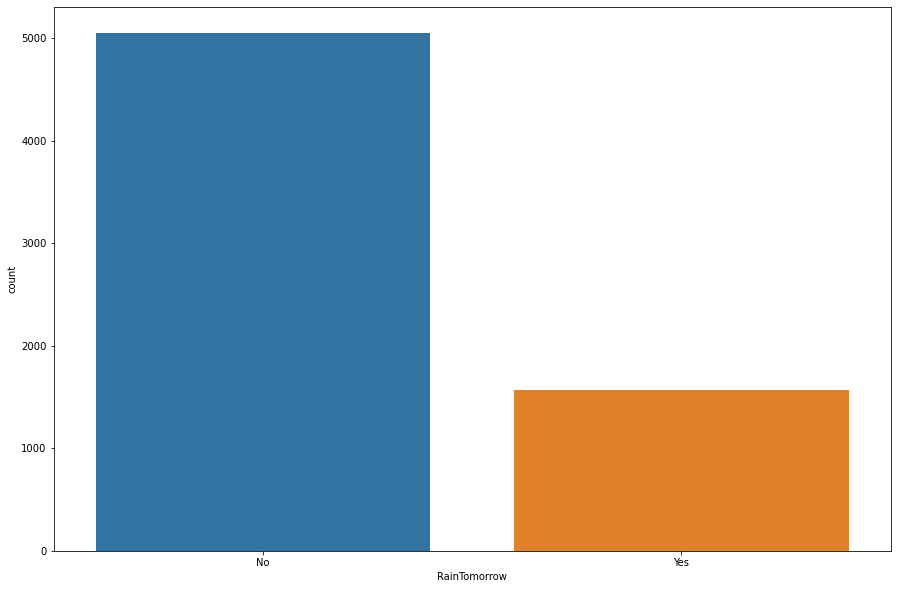

In [329]:
#plotting countplot
plt.figure(figsize=(15,10))
sns.countplot(x='RainTomorrow',data=data)
print(data1['RainTomorrow'].value_counts())
plt.show()

**In this plot we can see that most of the times there was no possibility of rain tomorrow, meaning it wont be raining  tomorrow.**

In [330]:
#checking column names
data1.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [331]:
#categorising continuous data and categorical data
cont_data=[col for col in data1.columns if data[col].dtype!='object']
cat_data=[col for col in data1.columns if data[col].dtype=='object']

In [332]:
cont_data

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

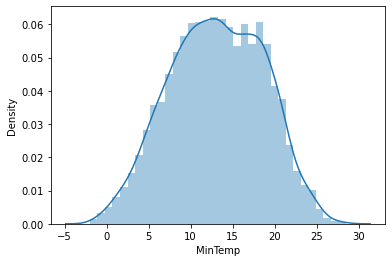

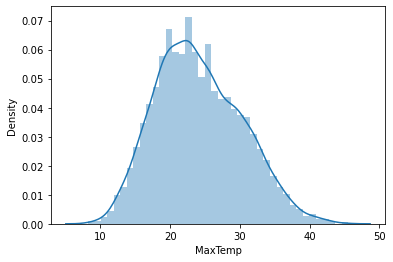

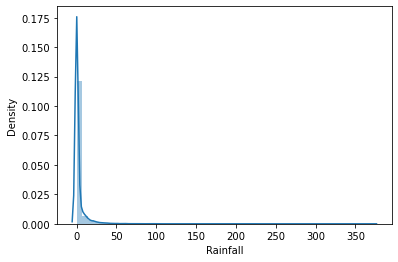

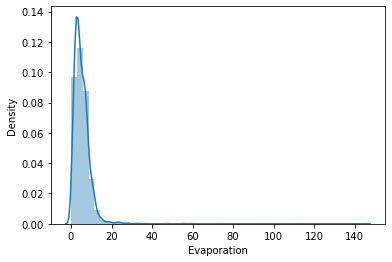

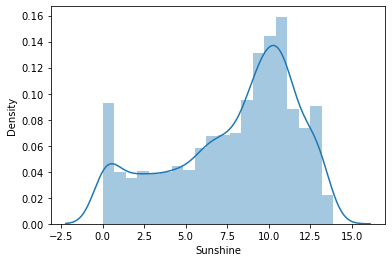

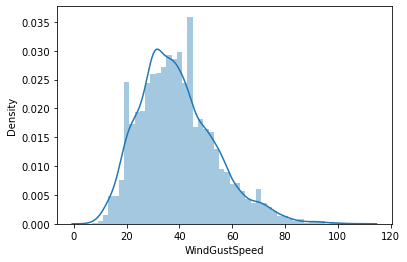

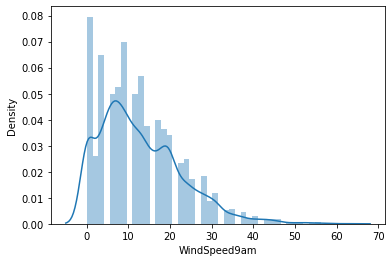

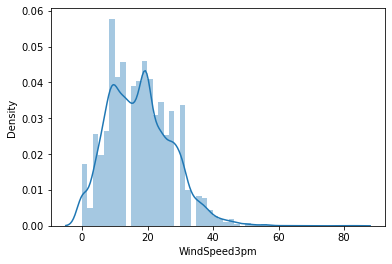

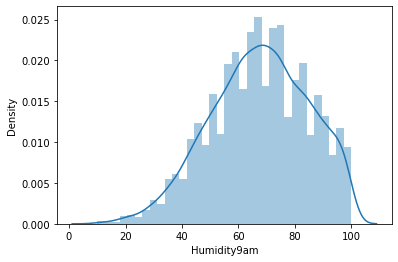

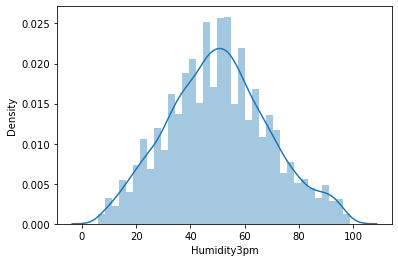

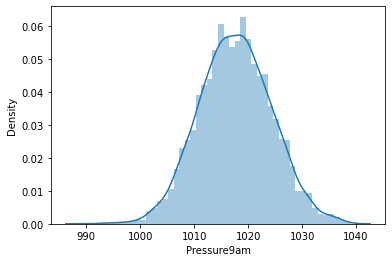

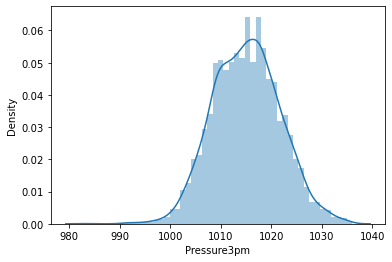

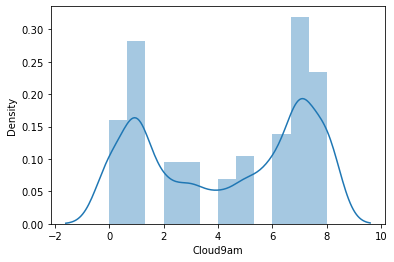

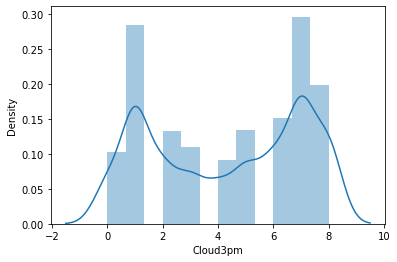

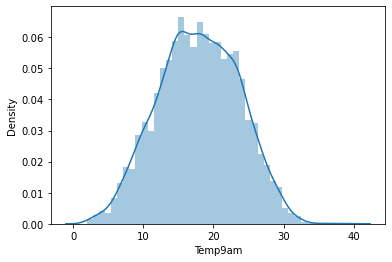

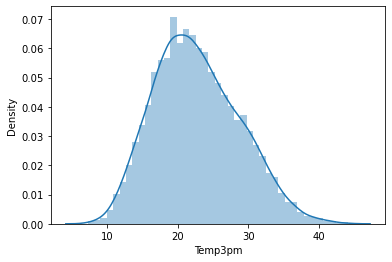

In [333]:
#plotting distribution plot
for i in data:
    if data[i].dtype!='object':
        sns.distplot(data[i],kde=True)
        plt.show()

**Observation**
* **In the above plot we can see that in column rainfall,evaporation,sunshine,windgustspeed,windspeed9am and windspeed3pm it appears to be skewnees is present and also the data is not normally distributed.**

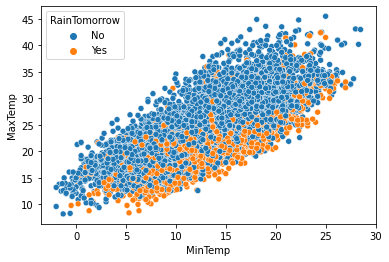

In [334]:
#plotting scatterplot
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering min and max temp most of the times there wont be a rainfall tomorrow.**

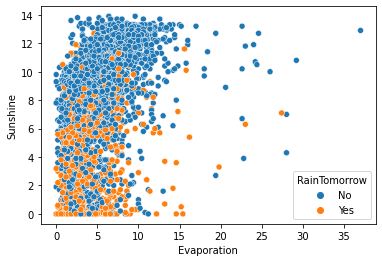

In [335]:
#plotting scatterplot
sns.scatterplot(x='Evaporation',y='Sunshine',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering evaporation and sunshine most of the times there wont be a rainfall tomorrow.**

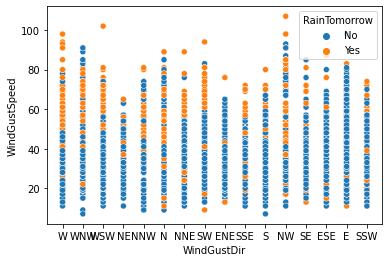

In [336]:
#plotting scatterplot
sns.scatterplot(x='WindGustDir',y='WindGustSpeed',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering windgusdir and windgustspeed most of the times there wont be a rainfall tomorrow.**

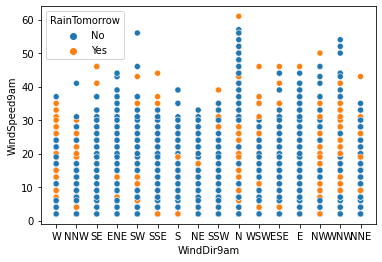

In [337]:
#plotting scatterplot
sns.scatterplot(x='WindDir9am',y='WindSpeed9am',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering winddir9am and windspeed9am most of the times there wont be a rainfall tomorrow.**

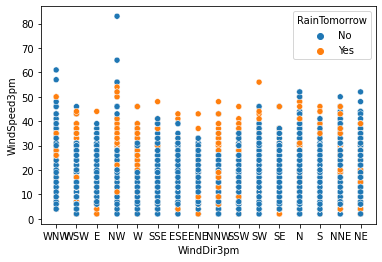

In [338]:
#plotting scatterplot
sns.scatterplot(x='WindDir3pm',y='WindSpeed3pm',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering winddir3pm and windspeed3pm most of the times there wont be a rainfall tomorrow.**

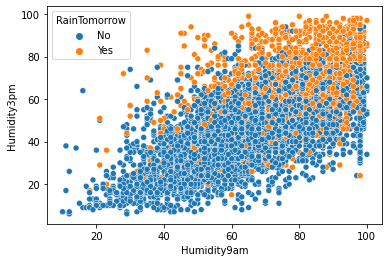

In [339]:
#plotting scatterplot
sns.scatterplot(x='Humidity9am',y='Humidity3pm',hue='RainTomorrow',data=data)
plt.show()#plotting scatterplot

**In this plot we can see that after considering humidity9am andhumidity3pm most of the times there wont be a rainfall tomorrow.**

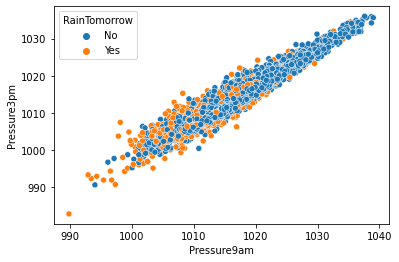

In [340]:
#plotting scatterplot
sns.scatterplot(x='Pressure9am',y='Pressure3pm',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering pressure9am and pressure3pm most of the times there wont be a rainfall tomorrow.**

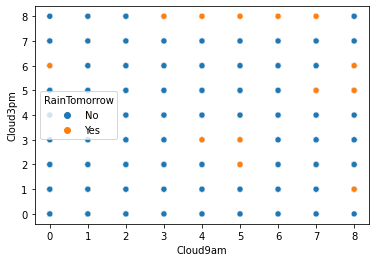

In [341]:
#plotting scatterplot
sns.scatterplot(x='Cloud9am',y='Cloud3pm',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering cloud9am and cloud3pm most of the times there wont be a rainfall tomorrow.**

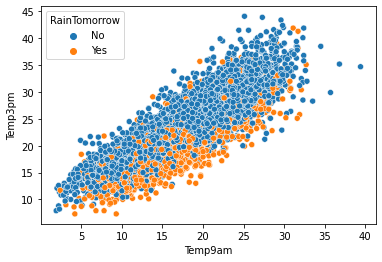

In [342]:
#plotting scatterplot
sns.scatterplot(x='Temp9am',y='Temp3pm',hue='RainTomorrow',data=data)
plt.show()

**In this plot we can see that after considering temp9am and temp3pm most of the times there wont be a rainfall tomorrow.**

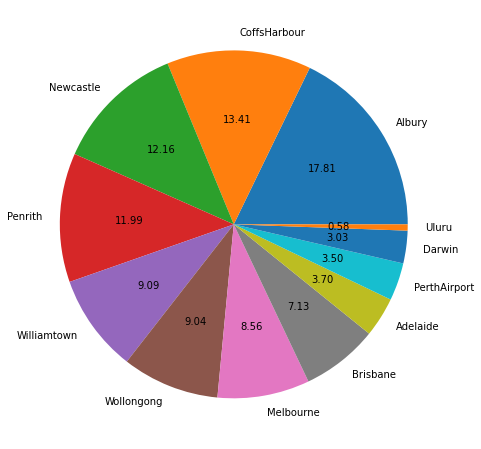

In [305]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=data['Location'].unique()
plt.pie(x=data['Location'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times observation was taken from the weather station coffsharbour.**

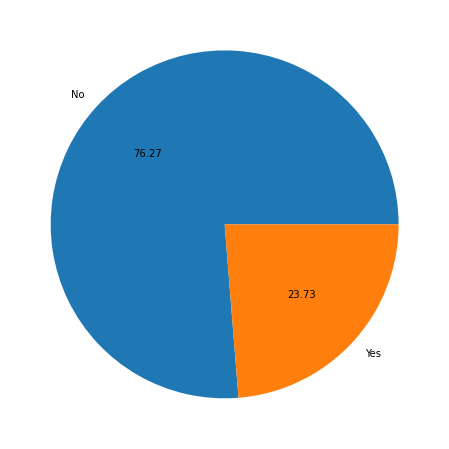

In [317]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes'
plt.pie(x=data['RainToday'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times there was no rain today.**

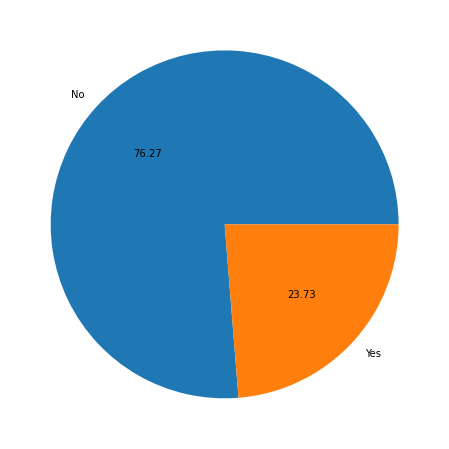

In [318]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes'
plt.pie(x=data['RainTomorrow'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times there there will be  no rain tomorrow.**

In [855]:
#checking mean of minimum and max temperation when it is not raining
data_no=data.loc[data['RainTomorrow']=='No']
data_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [856]:
#checking mean of minimum and max temperation when it is raining
data_yes=data.loc[data['RainTomorrow']=='Yes']
data_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,2012-10-27,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,NW,4.0,22.0,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,NNW,13.0,9.0,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8377,2012-11-02,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,NNW,9.0,17.0,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,Yes
8380,2012-11-05,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,NNW,9.0,19.0,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes


In [857]:
#replacing the NaN valuesof all the columns which have null values in respect to the data of column rain tomorrow
data_no['MinTemp']=data['MinTemp'].fillna(data_no['MinTemp'].mode()[0])
data_yes['MinTemp']=data['MinTemp'].fillna(data_yes['MinTemp'].mode()[0])

data_no['MaxTemp']=data['MaxTemp'].fillna(data_no['MaxTemp'].mode()[0])
data_yes['MaxTemp']=data_yes['MaxTemp'].fillna(data_yes['MaxTemp'].mode()[0])

data_no['Rainfall']=data['Rainfall'].fillna(data_no['Rainfall'].median())
data_yes['Rainfall']=data_yes['Rainfall'].fillna(data_yes['Rainfall'].median())

data_no['Evaporation']=data['Evaporation'].fillna(data_no['Evaporation'].mode()[0])
data_yes['Evaporation']=data_yes['Evaporation'].fillna(data_yes['Evaporation'].mode()[0])

data_no['Sunshine']=data['Sunshine'].fillna(data_no['Sunshine'].mode()[0])
data_yes['Sunshine']=data_yes['Sunshine'].fillna(data_yes['Sunshine'].mode()[0])

data_no['WindGustDir']=data['WindGustDir'].fillna(data_no['WindGustDir'].mode()[0])
data_yes['WindGustDir']=data_yes['WindGustDir'].fillna(data_yes['WindGustDir'].mode()[0])

data_no['WindGustSpeed']=data['WindGustSpeed'].fillna(data_no['WindGustSpeed'].median())
data_yes['WindGustSpeed']=data_yes['WindGustSpeed'].fillna(data_yes['WindGustSpeed'].median())

data_no['WindDir9am']=data['WindDir9am'].fillna(data_no['WindDir9am'].mode()[0])
data_yes['WindDir9am']=data_yes['WindDir9am'].fillna(data_yes['WindDir9am'].mode()[0])

data_no['WindDir3pm']=data['WindDir3pm'].fillna(data_no['WindDir3pm'].mode()[0])
data_yes['WindDir3pm']=data_yes['WindDir3pm'].fillna(data_yes['WindDir3pm'].mode()[0])

data_no['WindSpeed9am']=data['WindSpeed9am'].fillna(data_no['WindSpeed9am'].median())
data_yes['WindSpeed9am']=data_yes['WindSpeed9am'].fillna(data_yes['WindSpeed9am'].median())

data_no['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data_no['WindSpeed3pm'].median())
data_yes['WindSpeed3pm']=data_yes['WindSpeed3pm'].fillna(data_yes['WindSpeed3pm'].median())

data_no['Humidity9am']=data['Humidity9am'].fillna(data_no['Humidity9am'].mode()[0])
data_yes['Humidity9am']=data_yes['Humidity9am'].fillna(data_yes['Humidity9am'].mode()[0])

data_no['Humidity3pm']=data['Humidity3pm'].fillna(data_no['Humidity3pm'].median())
data_yes['Humidity3pm']=data_yes['Humidity3pm'].fillna(data_yes['Humidity3pm'].median())

data_no['Pressure9am']=data['Pressure9am'].fillna(data_no['Pressure9am'].median())
data_yes['Pressure9am']=data_yes['Pressure9am'].fillna(data_yes['Pressure9am'].median())

data_no['Pressure3pm']=data['Pressure3pm'].fillna(data_no['Pressure3pm'].median())
data_yes['Pressure3pm']=data_yes['Pressure3pm'].fillna(data_yes['Pressure3pm'].median())

data_no['Cloud9am']=data['Cloud9am'].fillna(data_no['Cloud9am'].median())
data_yes['Cloud9am']=data_yes['Cloud9am'].fillna(data_yes['Cloud9am'].median())

data_no['Cloud3pm']=data['Cloud3pm'].fillna(data_no['Cloud3pm'].median())
data_yes['Cloud3pm']=data_yes['Cloud3pm'].fillna(data_yes['Cloud3pm'].median())

data_no['Temp9am']=data['Temp9am'].fillna(data_no['Temp9am'].mode()[0])
data_yes['Temp9am']=data_yes['Temp9am'].fillna(data_yes['Temp9am'].mode()[0])

data_no['Temp3pm']=data['Temp3pm'].fillna(data_no['Temp3pm'].mode()[0])
data_yes['Temp3pm']=data_yes['Temp3pm'].fillna(data_yes['Temp3pm'].mode()[0])

**Since column min temp, max temp, humidy at 9am and 3pm, temp at 9am and 3pm this column data type is float, so shpuld have been replaced it with mean or median but because they are temperatures that is why replacing them with mode.**

In [858]:
#transferring all the data into data1
data1= data_yes.append(data_no, ignore_index=True)
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2017-06-20,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,3.0,3.0,9.4,20.9,No,No
6620,2017-06-21,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,3.0,3.0,10.1,22.4,No,No
6621,2017-06-22,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,3.0,3.0,10.9,24.5,No,No
6622,2017-06-23,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,3.0,3.0,12.5,26.1,No,No


In [859]:
#checking shape
data1.shape

(6624, 23)

In [860]:
#checking null values
data1.isna().sum()


Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday        66
RainTomorrow      0
dtype: int64

**Dropping all the null values which is present in column Rain today because it is measured by Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0, so it is very difficult to fill the nan values with mode.**

In [861]:
#dropping all null values
data1.dropna(inplace=True)

In [862]:
#checking null values
data1.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**So we can see that null values which was in column rain today have been dropped.**

In [863]:
#converting date feature into datetime
data1['Date']=pd.to_datetime(data1['Date'])

In [864]:
data1['year']=data1['Date'].dt.year

In [865]:
data1['month']=data1['Date'].dt.month

In [866]:
data1['day']=data1['Date'].dt.day

In [867]:
#Dropping date column
data1=data1.drop(['Date'],axis=1)

In [868]:
data1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17


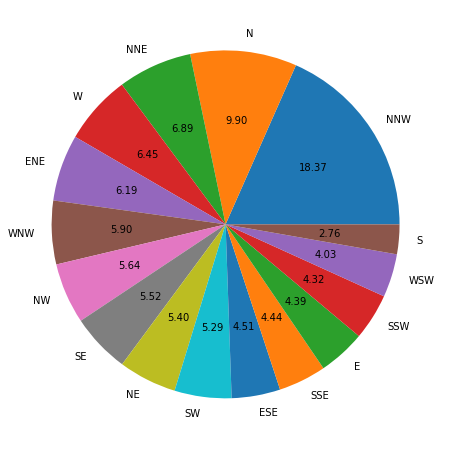

In [336]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=data1['WindGustDir'].unique()
plt.pie(x=data1['WindGustDir'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The direction of the strongest wind gust is in North.**

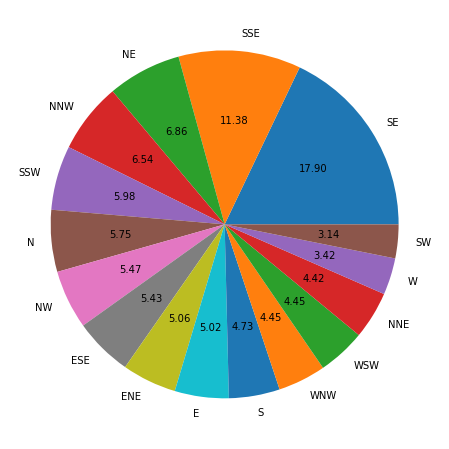

In [337]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=data1['WindDir9am'].unique()
plt.pie(x=data1['WindDir9am'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 9am is in South of south east direction.**

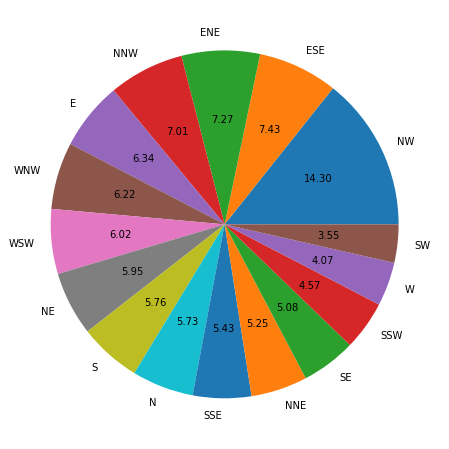

In [338]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=data1['WindDir3pm'].unique()
plt.pie(x=data1['WindDir3pm'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 3pm is in East of south east direction.**

In [346]:
#checking for the data when rain today=yes and raintomorrow=yes
both_yes=data1[data1['RainToday']=='Yes'][data1['RainTomorrow']=='Yes']
both_yes

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
2,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
5,Albury,13.5,22.9,16.8,2.6,0.0,W,63.0,N,WNW,6.0,20.0,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes,2008,12,18
11,Albury,17.1,25.8,5.8,2.6,0.0,ENE,31.0,N,S,0.0,13.0,82.0,68.0,1017.4,1014.7,8.0,7.0,19.0,23.8,Yes,Yes,2009,3,13
12,Albury,16.4,27.0,3.0,2.6,0.0,SW,69.0,E,N,9.0,22.0,82.0,74.0,1012.7,1008.0,7.0,4.0,19.9,19.7,Yes,Yes,2009,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,Darwin,23.7,33.4,8.2,6.0,9.8,ENE,39.0,ESE,ENE,22.0,19.0,72.0,51.0,1013.0,1009.4,7.0,5.0,27.8,33.2,Yes,Yes,2012,4,14
1561,Darwin,23.4,32.6,40.0,7.4,8.8,SE,33.0,SE,ENE,15.0,9.0,82.0,56.0,1011.2,1008.5,8.0,7.0,26.0,31.7,Yes,Yes,2012,4,24
1563,Darwin,22.3,31.8,25.8,7.4,7.4,ESE,41.0,SE,SE,24.0,22.0,80.0,53.0,1011.2,1007.7,7.0,6.0,26.3,31.1,Yes,Yes,2012,5,3
1565,Darwin,22.4,30.3,21.2,11.0,2.4,SSE,57.0,NE,NW,17.0,11.0,96.0,57.0,1017.1,1012.1,8.0,6.0,22.6,28.9,Yes,Yes,2012,9,30


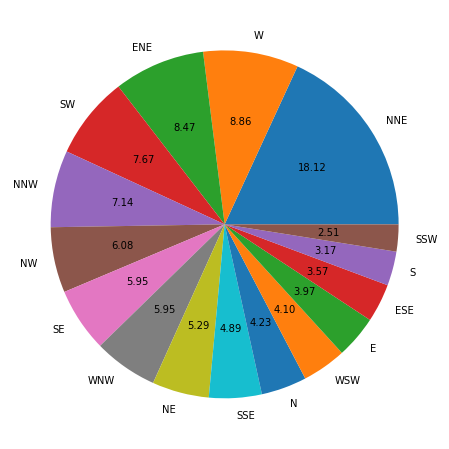

In [348]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=both_yes['WindGustDir'].unique()
plt.pie(x=both_yes['WindGustDir'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The direction of the strongest wind gust is in North direction.**

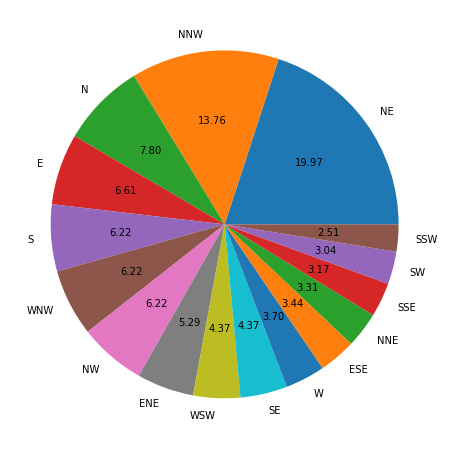

In [349]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=both_yes['WindDir9am'].unique()
plt.pie(x=both_yes['WindDir9am'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 9am is in north east direction.**

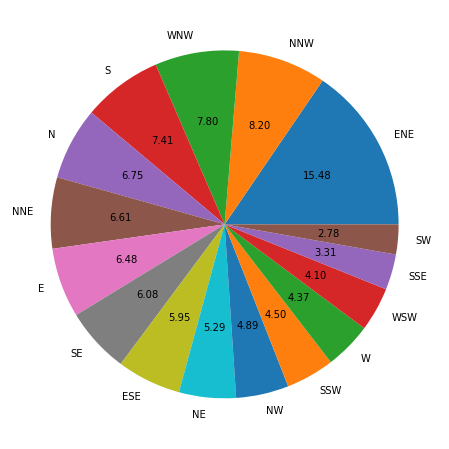

In [350]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=both_yes['WindDir3pm'].unique()
plt.pie(x=both_yes['WindDir3pm'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 3pm is in East of North east direction.**

In [365]:
#checking for the data when rain today=No and raintomorrow=No
both_no=data1[data1['RainToday']=='No'][data1['RainTomorrow']=='No']
both_no

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
1572,Albury,13.4,22.9,0.6,4.0,11.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,3.0,16.9,21.8,No,No,2008,12,1
1573,Albury,7.4,25.1,0.0,4.0,11.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,3.0,3.0,17.2,24.3,No,No,2008,12,2
1574,Albury,12.9,25.7,0.0,4.0,11.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,3.0,2.0,21.0,23.2,No,No,2008,12,3
1575,Albury,9.2,28.0,0.0,4.0,11.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,3.0,3.0,18.1,26.5,No,No,2008,12,4
1576,Albury,17.5,32.3,1.0,4.0,11.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,3.0,3.0,9.4,20.9,No,No,2017,6,20
6620,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,3.0,3.0,10.1,22.4,No,No,2017,6,21
6621,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,3.0,3.0,10.9,24.5,No,No,2017,6,22
6622,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,3.0,3.0,12.5,26.1,No,No,2017,6,23


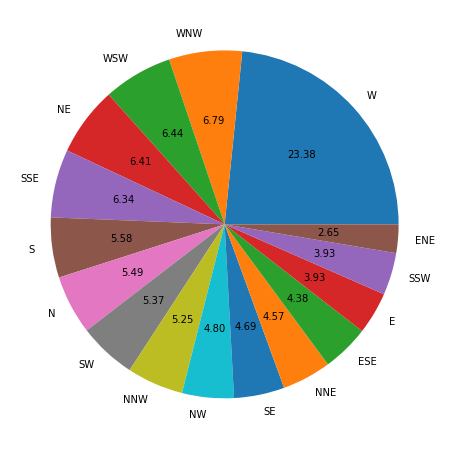

In [367]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=both_no['WindGustDir'].unique()
plt.pie(x=both_no['WindGustDir'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The direction of the strongest wind gust is in west of North west direction.**

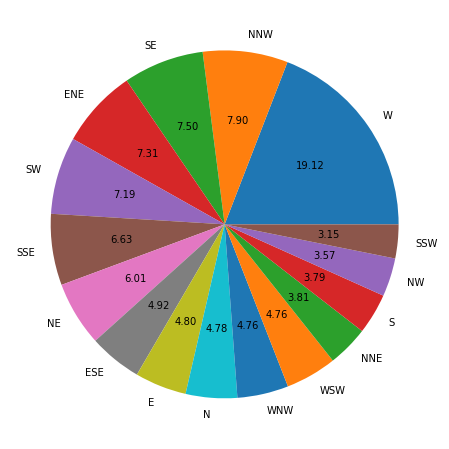

In [368]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=both_no['WindDir9am'].unique()
plt.pie(x=both_no['WindDir9am'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 9am is in west direction.**

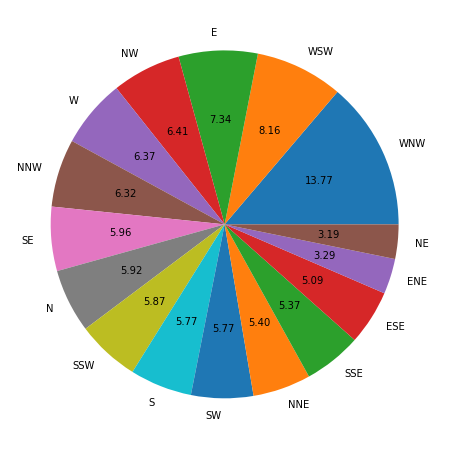

In [369]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=both_no['WindDir3pm'].unique()
plt.pie(x=both_no['WindDir3pm'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 3pm is in West of North west direction.**

In [370]:
#checking for the data when rain today=No and raintomorrow=yes
no_yes=data1[data1['RainToday']=='No'][data1['RainTomorrow']=='Yes']
no_yes

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
4,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17
6,Albury,19.7,27.2,0.0,2.6,0.0,WNW,46.0,NW,WSW,19.0,30.0,49.0,22.0,1004.8,1004.2,7.0,7.0,21.6,26.1,No,Yes,2008,12,29
7,Albury,24.4,34.0,0.6,2.6,0.0,NW,98.0,N,NNW,26.0,48.0,60.0,39.0,1005.3,997.8,4.0,1.0,26.1,33.1,No,Yes,2009,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,Darwin,25.4,31.3,0.6,6.8,3.8,SW,41.0,N,WNW,11.0,26.0,76.0,62.0,1013.6,1010.2,6.0,8.0,28.6,30.7,No,Yes,2012,10,18
1567,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,NW,4.0,22.0,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes,2012,10,27
1569,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,NNW,9.0,17.0,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,Yes,2012,11,2
1570,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,NNW,9.0,19.0,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes,2012,11,5


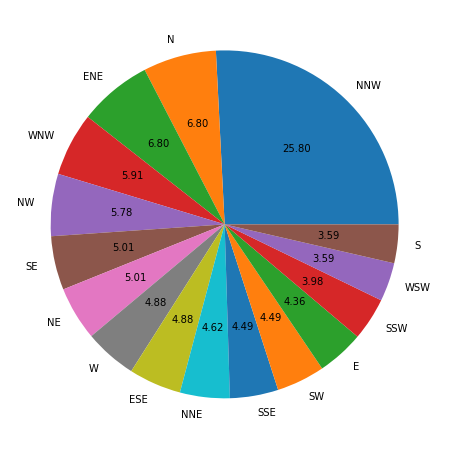

In [372]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=no_yes['WindGustDir'].unique()
plt.pie(x=no_yes['WindGustDir'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The direction of the strongest wind gust is in North direction.**

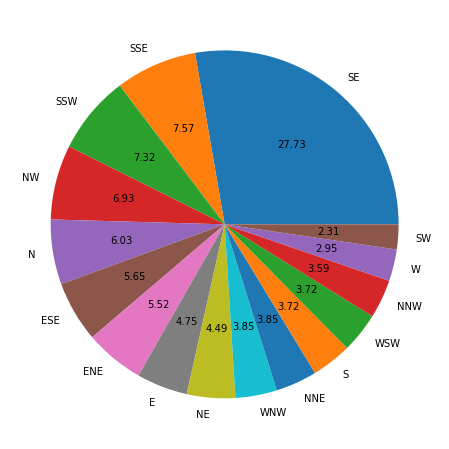

In [373]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=no_yes['WindDir9am'].unique()
plt.pie(x=no_yes['WindDir9am'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 9am is in south east direction.**

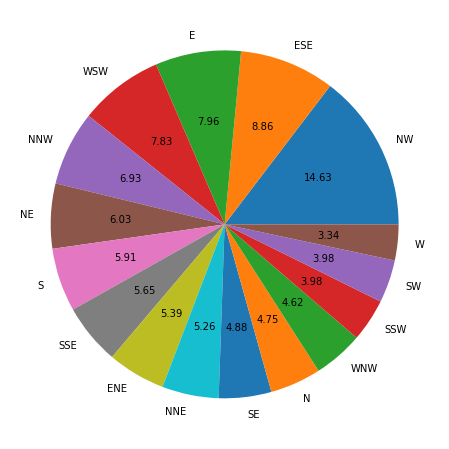

In [374]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=no_yes['WindDir3pm'].unique()
plt.pie(x=no_yes['WindDir3pm'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 3pm is in North west direction.**

In [375]:
#checking for the data when rain today=yes and raintomorrow=No
yes_no=data1[data1['RainToday']=='Yes'][data1['RainTomorrow']=='No']
yes_no

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
1580,Albury,13.1,30.1,1.4,4.0,11.0,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,3.0,3.0,20.1,28.2,Yes,No,2008,12,10
1581,Albury,12.6,21.0,3.6,4.0,11.0,SW,44.0,W,SSW,24.0,20.0,65.0,43.0,1001.2,1001.8,3.0,7.0,15.8,19.8,Yes,No,2008,12,14
1583,Albury,11.2,22.5,10.6,4.0,11.0,SSE,43.0,WSW,SW,24.0,17.0,47.0,32.0,1009.4,1009.7,3.0,2.0,15.5,21.0,Yes,No,2008,12,19
1593,Albury,12.5,24.2,1.2,4.0,11.0,WNW,50.0,WSW,SW,11.0,22.0,78.0,70.0,1005.6,1003.4,8.0,8.0,12.5,18.2,Yes,No,2008,12,30
1616,Albury,18.8,35.2,6.4,4.0,11.0,WNW,52.0,S,NW,6.0,28.0,43.0,28.0,1007.9,1003.9,3.0,3.0,22.8,33.0,Yes,No,2009,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6568,Darwin,24.5,33.2,1.2,4.6,10.0,NNW,33.0,NNE,N,17.0,22.0,67.0,43.0,1013.4,1008.8,3.0,3.0,28.7,32.0,Yes,No,2012,10,19
6576,Darwin,23.3,34.2,3.2,5.0,10.2,ENE,35.0,NE,NNW,6.0,19.0,60.0,56.0,1011.1,1007.0,3.0,2.0,29.9,32.0,Yes,No,2012,10,29
6580,Darwin,23.2,33.4,31.6,13.0,6.9,SE,48.0,ESE,WNW,9.0,17.0,88.0,58.0,1010.3,1007.0,7.0,2.0,26.0,32.3,Yes,No,2012,11,3
6582,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,NNE,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,No,2012,11,6


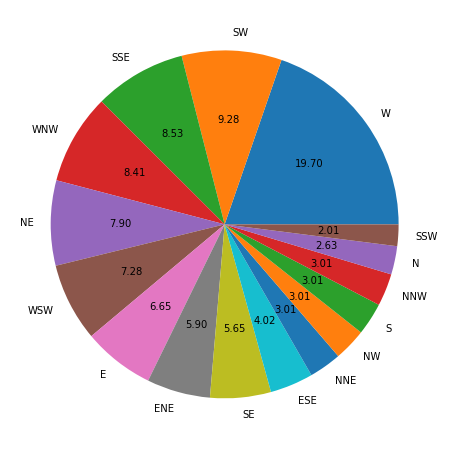

In [377]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=yes_no['WindGustDir'].unique()
plt.pie(x=yes_no['WindGustDir'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The direction of the strongest wind gust is in south west direction.**

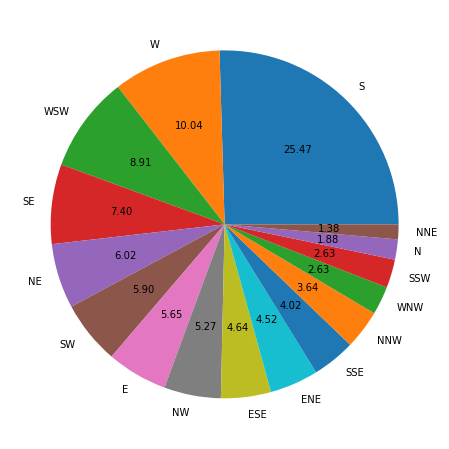

In [378]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=yes_no['WindDir9am'].unique()
plt.pie(x=yes_no['WindDir9am'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 9am is in South direction.**

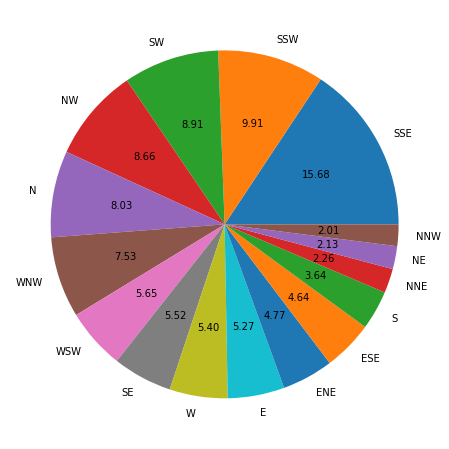

In [379]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=yes_no['WindDir3pm'].unique()
plt.pie(x=yes_no['WindDir3pm'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 3pm is in south of south east direction.**

In [383]:
#checking top 10 highest rainfall
high_rainfall=data1.sort_values(by='Rainfall',ascending=False)[:10]
high_rainfall

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
269,CoffsHarbour,17.4,23.1,371.0,2.6,3.5,N,43.0,SW,S,13.0,19.0,93.0,81.0,1026.6,1025.9,8.0,5.0,18.6,22.0,Yes,Yes,2009,11,7
3201,Newcastle,12.0,21.7,240.0,4.0,11.0,E,35.0,NW,SE,4.0,0.0,72.0,62.0,1018.3,1015.7,6.0,6.0,17.5,21.0,Yes,No,2015,4,23
718,Williamtown,18.5,19.9,225.0,2.6,0.0,S,80.0,SSW,SSW,39.0,35.0,95.0,90.0,1008.5,1008.8,8.0,8.0,19.2,19.4,Yes,Yes,2016,1,6
1200,Brisbane,21.3,26.6,168.4,2.6,0.7,NE,26.0,S,NE,2.0,6.0,98.0,88.0,1008.5,1005.8,8.0,8.0,23.3,24.6,Yes,Yes,2012,1,25
1546,Darwin,24.1,29.8,142.2,2.6,0.5,WNW,78.0,WNW,NW,33.0,28.0,98.0,84.0,1005.9,1002.5,8.0,8.0,24.5,28.3,Yes,Yes,2012,3,14
266,CoffsHarbour,17.3,21.0,141.8,2.6,0.0,N,43.0,E,ENE,15.0,24.0,78.0,82.0,1023.7,1023.9,8.0,8.0,20.6,20.1,Yes,Yes,2009,10,27
413,Newcastle,11.2,21.8,132.5,2.6,0.0,N,43.0,SE,NW,37.0,4.0,99.0,83.0,1015.3,1013.2,8.0,8.0,16.5,17.6,Yes,Yes,2013,11,18
368,CoffsHarbour,16.2,19.5,128.0,0.2,0.0,SE,61.0,ESE,SE,28.0,35.0,93.0,92.0,1021.2,1018.1,8.0,8.0,18.2,18.9,Yes,Yes,2010,10,4
3798,Williamtown,16.0,23.2,110.8,4.0,4.7,SW,26.0,WSW,S,13.0,17.0,87.0,65.0,1021.3,1018.1,7.0,4.0,19.0,22.6,Yes,No,2016,4,18
177,Albury,20.4,23.0,99.2,2.6,0.0,NW,28.0,NE,NW,11.0,4.0,97.0,95.0,1008.6,1007.3,5.0,8.0,22.5,22.5,Yes,Yes,2011,2,5


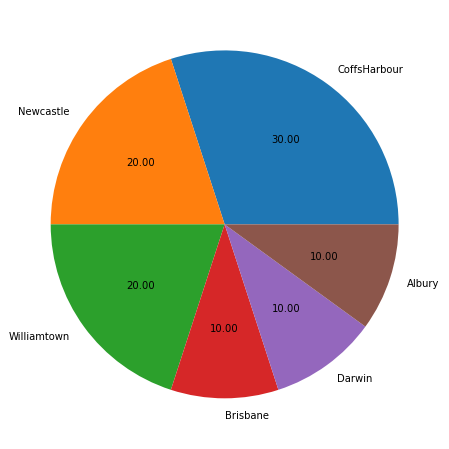

In [385]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=high_rainfall['Location'].unique()
plt.pie(x=high_rainfall['Location'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the highest rainfall was observed from the weather station coffsharbour.**

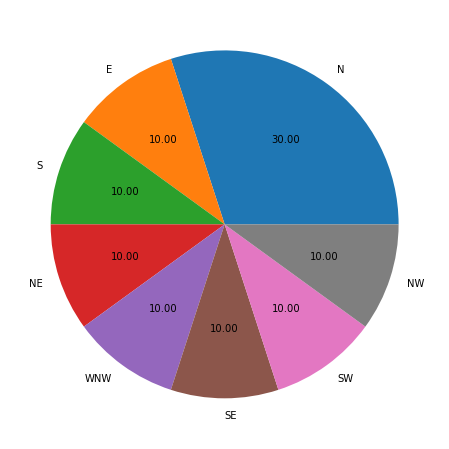

In [386]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=high_rainfall['WindGustDir'].unique()
plt.pie(x=high_rainfall['WindGustDir'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The direction of the strongest wind gust is in East direction.**

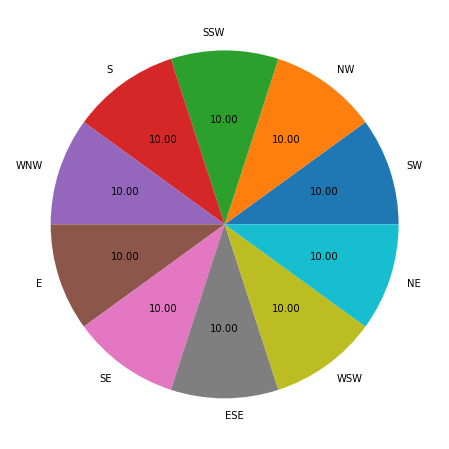

In [387]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=high_rainfall['WindDir9am'].unique()
plt.pie(x=high_rainfall['WindDir9am'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 9am is in 10% each in each of the above direction.**

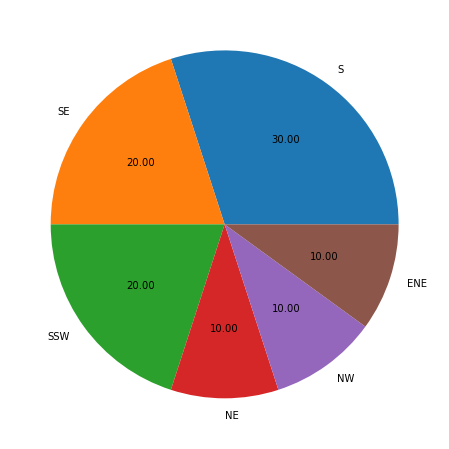

In [388]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=high_rainfall['WindDir3pm'].unique()
plt.pie(x=high_rainfall['WindDir3pm'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times The Direction of the wind at 3pm is in East of south direction.**

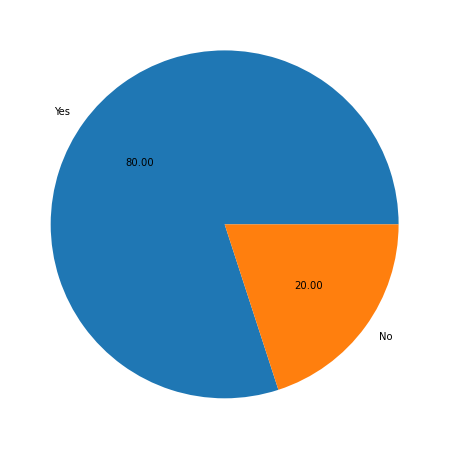

In [390]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels=high_rainfall['RainTomorrow'].unique()
plt.pie(x=high_rainfall['RainTomorrow'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times there was going to be a rainfall tomorrow whenever there was high rainfall.**

In [869]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [870]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data1['Location'])
df2=lab_enc.fit_transform(data1['WindGustDir'])
df3=lab_enc.fit_transform(data1['WindDir9am'])
df4=lab_enc.fit_transform(data1['WindDir3pm'])
df5=lab_enc.fit_transform(data1['RainToday'])
df6=lab_enc.fit_transform(data1['RainTomorrow'])

In [871]:
#Transfering the data 
data1['Location']=df1
data1['WindGustDir']=df2
data1['WindDir9am']=df3
data1['WindDir3pm']=df4
data1['RainToday']=df5
data1['RainTomorrow']=df6

In [872]:
#Checking whether the data is encoded or not
data1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,9.7,31.9,0.0,2.6,0.0,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,0,1,2008,12,9
1,1,13.4,30.4,0.0,2.6,0.0,3,30.0,10,2,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,0,1,2008,12,11
2,1,15.9,21.7,2.2,2.6,0.0,5,31.0,4,1,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,1,1,2008,12,12
3,1,15.9,18.6,15.6,2.6,0.0,13,61.0,6,6,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,1,1,2008,12,13
4,1,14.1,20.9,0.0,2.6,0.0,1,22.0,11,0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,0,1,2008,12,17


**So we can see that categorical columns have been encoded.**

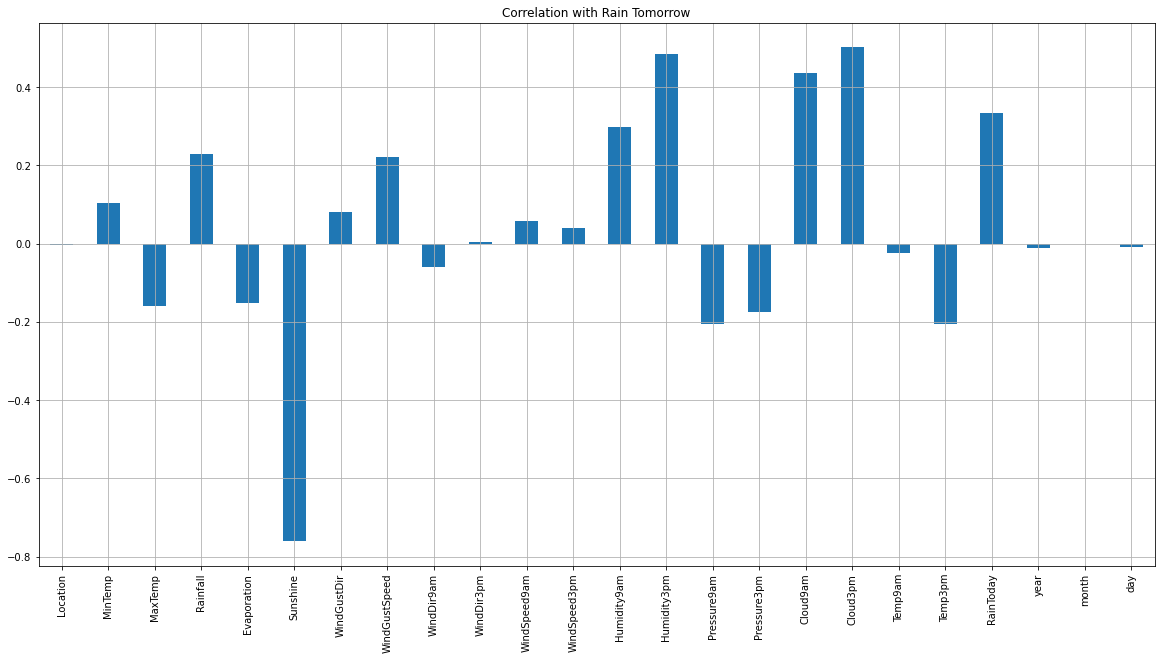

In [446]:
#Checking for correlation
data1.drop(['RainTomorrow'],axis=1).corrwith(data1['RainTomorrow']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Rain Tomorrow')
plt.show()

**In this we can see that column sunshine,humidity9am,humidity3pm,cloud9am and cloud3pm are highly correlated to the label.And location winddsir3pm year,month,day and temp9am are least correlated to the label.**

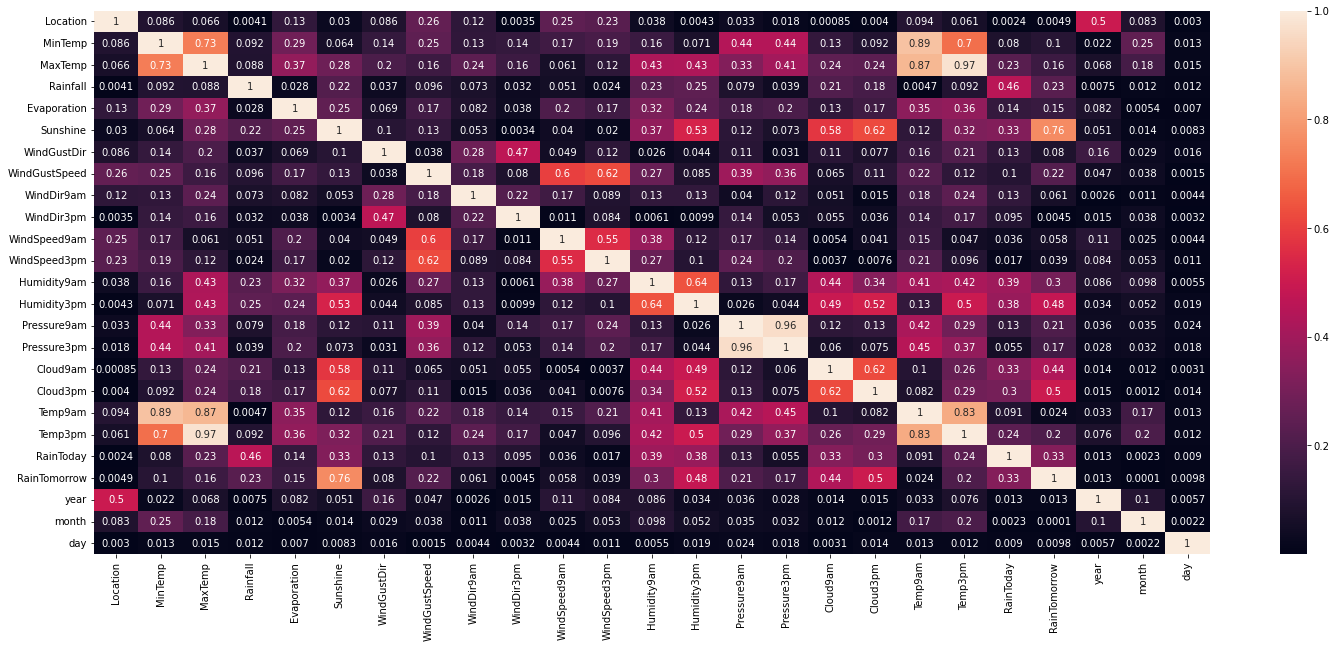

In [447]:
#Plotting heatmap
corr=data1.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **In this we can see that mintemp is multicorrelated to the temp9am.**
* **Maxtemp is multicorrealted with temp3pm and temp9am.**
* **pressure9am is multicorrelated with pressure3pm.**
* **temp9am is multicorrelated with temp3pm.**
* **So further i plot scatter and will check the relationship or trens=d between them.**

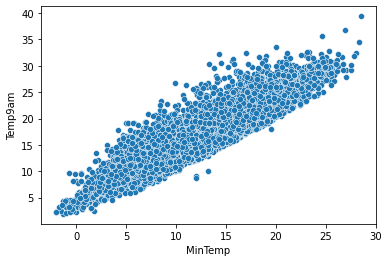

In [448]:
#plotting scatterplot
sns.scatterplot(x='MinTemp',y='Temp9am',data=data1)
plt.show()

**In this plot we can see a postive relatiuonship or trend between the features so that means there is multicollinearity problem.so i will criss verify this by using vif.**

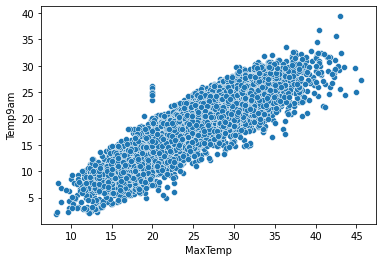

In [449]:
#plotting scatterplot
sns.scatterplot(x='MaxTemp',y='Temp9am',data=data1)
plt.show()

**In this plot we can see a postive relatiuonship or trend between the features so that means there is multicollinearity problem.so i will criss verify this by using vif.**

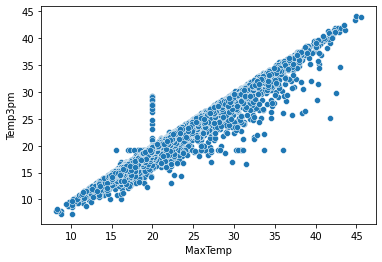

In [450]:
#plotting scatterplot
sns.scatterplot(x='MaxTemp',y='Temp3pm',data=data1)
plt.show()

**In this plot we can see a postive relatiuonship or trend between the features so that means there is multicollinearity problem.so i will criss verify this by using vif.**

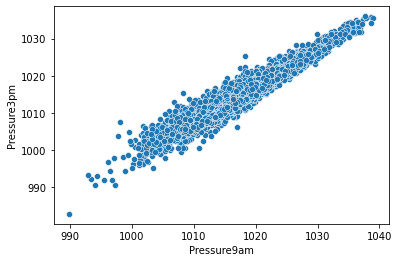

In [451]:
#plotting scatterplot
sns.scatterplot(x='Pressure9am',y='Pressure3pm',data=data1)
plt.show()

**In this plot we can see a postive relatiuonship or trend between the features so that means there is multicollinearity problem.so i will criss verify this by using vif.**

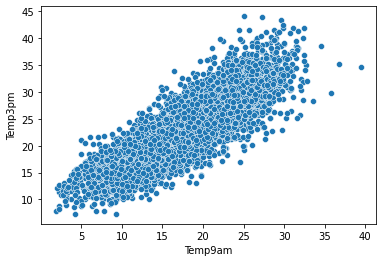

In [452]:
#plotting scatterplot
sns.scatterplot(x='Temp9am',y='Temp3pm',data=data1)
plt.show()

**In this plot we can see a postive relatiuonship or trend between the features so that means there is multicollinearity problem.so i will criss verify this by using vif.**

In [873]:
data2=data1[[
'MinTemp',
'MaxTemp',
'Rainfall',
'Evaporation',
'Sunshine',
'WindGustSpeed',
'WindSpeed9am',
'WindSpeed3pm',
'Humidity9am',
'Humidity3pm',
'Pressure9am',
'Pressure3pm',
'Cloud9am',
'Cloud3pm',
'Temp9am',
'Temp3pm',
'year',
'month',
'day']]

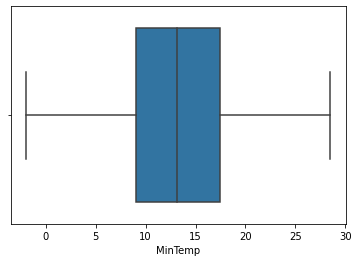

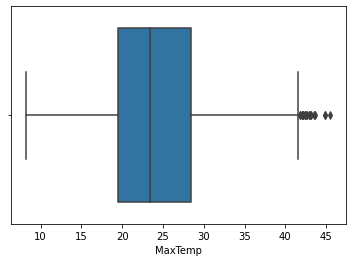

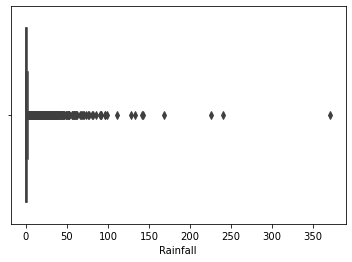

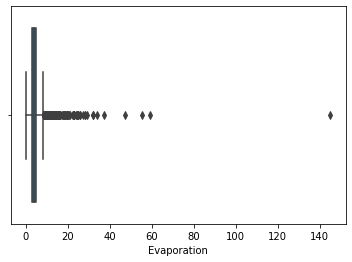

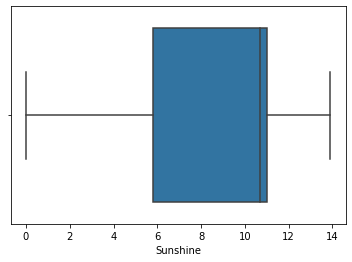

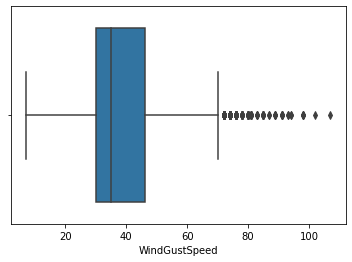

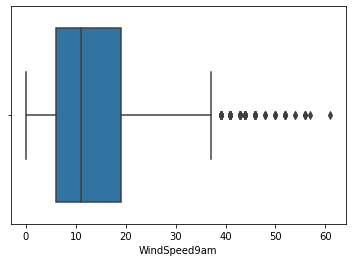

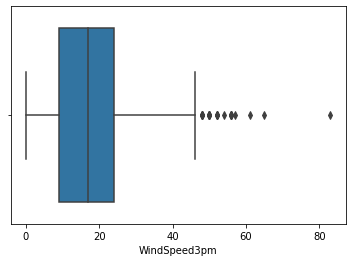

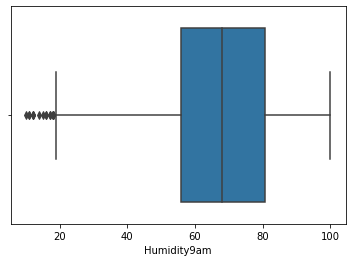

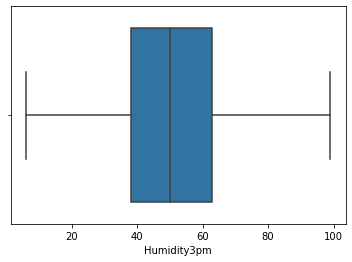

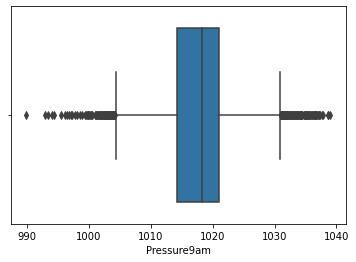

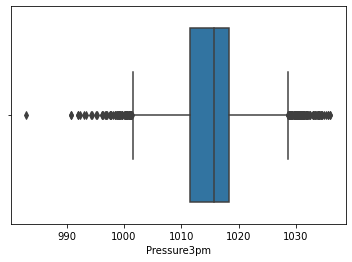

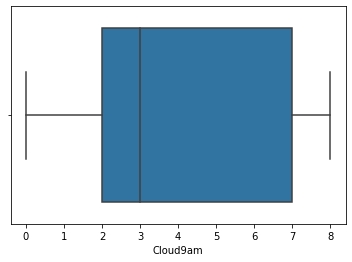

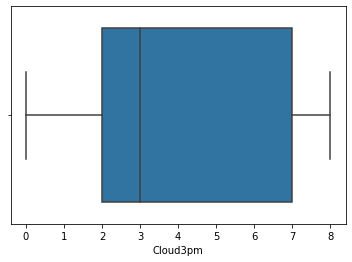

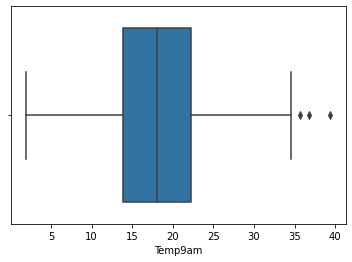

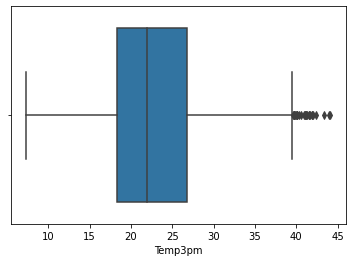

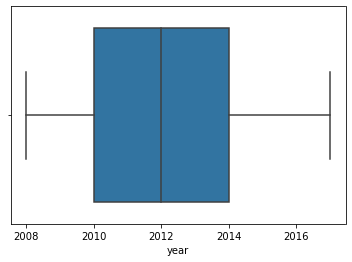

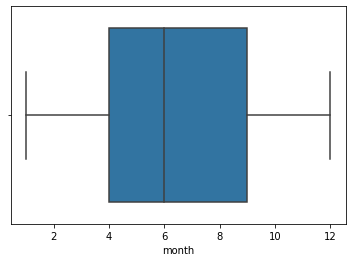

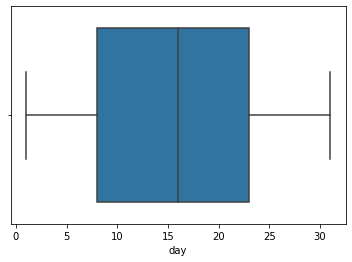

In [874]:
#checking for outliers
for i in data2:
    if data2[i].dtype!='object':
        sns.boxplot(data2[i],data=data2)
        plt.show()

**In the above plots we can see that in columns Rainfall,Evaporation,Windgustspeed,windspeed9am,windspeed3pm,humidity9am,pressure9am,pressure3pm,temp9am and temp3pm outliers are present.so using z-score method to remove the outliers.**

In [875]:
#Importing required libraries
from scipy.stats import zscore

In [876]:
#Removing outliers
z_score=zscore(data1[['MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [877]:
data1=data1[z]

In [878]:
data1.shape

(6216, 25)

In [879]:
#Percentage Loss of Data
data_loss=((6558-6216)/6558)*100
print(f'Data Loss:{data_loss} %')

Data Loss:5.215004574565416 %


In [880]:
#checking skewness
data1.skew()

Location         0.003629
MinTemp         -0.064709
MaxTemp          0.276456
Rainfall         3.512366
Evaporation      1.387777
Sunshine        -1.051287
WindGustDir      0.112238
WindGustSpeed    0.555384
WindDir9am      -0.169881
WindDir3pm      -0.122908
WindSpeed9am     0.682925
WindSpeed3pm     0.347580
Humidity9am     -0.232143
Humidity3pm      0.162050
Pressure9am      0.067248
Pressure3pm      0.098106
Cloud9am         0.060414
Cloud3pm         0.135371
Temp9am         -0.070276
Temp3pm          0.306106
RainToday        1.302692
RainTomorrow     1.323624
year             0.353574
month            0.036580
day              0.001174
dtype: float64

**In this we can see that ic column rainfall,evaporation,sunshine,windgustspeed and WindSpeed9am skewness is present.so using power transform method remove the skewness.And rest of the columns who have value more than 0.5 are categorical data columns and we dont treat skewness of categorical data columns and label.**

In [881]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [882]:
data1[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am']]=power_transform(data1[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am']],method='yeo-johnson')
data1[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am']]

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am
1,-0.654820,-1.817591,-0.806943,-0.568252,0.660606
2,1.559928,-1.817591,-0.806943,-0.477740,0.480409
4,-0.654820,-1.817591,-0.806943,-1.359420,0.081081
5,1.882476,-1.817591,-0.806943,1.854044,-0.532892
6,-0.654820,-1.817591,-0.806943,0.726141,0.830721
...,...,...,...,...,...
6619,-0.654820,0.679621,-0.005222,-0.477740,0.480409
6620,-0.654820,0.679621,-0.005222,-0.477740,0.288144
6621,-0.654820,0.679621,-0.005222,-1.359420,0.288144
6622,-0.654820,0.679621,-0.005222,0.035050,-0.144725


In [883]:
#checking skewness
data1.skew()

Location         0.003629
MinTemp         -0.064709
MaxTemp          0.276456
Rainfall         1.042250
Evaporation      0.007611
Sunshine        -0.820449
WindGustDir      0.112238
WindGustSpeed    0.005039
WindDir9am      -0.169881
WindDir3pm      -0.122908
WindSpeed9am    -0.133162
WindSpeed3pm     0.347580
Humidity9am     -0.232143
Humidity3pm      0.162050
Pressure9am      0.067248
Pressure3pm      0.098106
Cloud9am         0.060414
Cloud3pm         0.135371
Temp9am         -0.070276
Temp3pm          0.306106
RainToday        1.302692
RainTomorrow     1.323624
year             0.353574
month            0.036580
day              0.001174
dtype: float64

In [884]:
#Dividing dataset into features and label
#Features
x=data1.drop(['RainTomorrow'],axis=1)
#Label
y=data1['RainTomorrow']

In [885]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-1.38592668,  0.07639755,  1.05597551, ..., -1.76687247,
         1.67789632, -0.53629836],
       [-1.38592668,  0.52543795, -0.38677341, ..., -1.76687247,
         1.67789632, -0.4226312 ],
       [-1.38592668,  0.20212886, -0.51943998, ..., -1.76687247,
         1.67789632,  0.14570463],
       ...,
       [ 1.20804983, -1.68384084,  0.21022614, ...,  2.17812727,
        -0.12506029,  0.71404045],
       [ 1.20804983, -1.36053175,  0.47555928, ...,  2.17812727,
        -0.12506029,  0.82770762],
       [ 1.20804983, -0.92945296,  0.4921426 , ...,  2.17812727,
        -0.12506029,  0.94137479]])

In [886]:
x_scaler.shape

(6216, 24)

In [887]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [888]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.646199,Location
1,9.311330,MinTemp
2,25.940783,MaxTemp
3,8.564981,Rainfall
4,1.770130,Evaporation
5,2.390669,Sunshine
6,1.522811,WindGustDir
7,2.248607,WindGustSpeed
8,1.307653,WindDir9am
9,1.453568,WindDir3pm


**So we can see that max temp,pressure9am,pressure3pm,temp9am,temp3pm are highly multicorrelated.so dropping this columns**

In [889]:
#dropping column max temp,pressure9am,pressure3pm,temp9am,temp3pm 
x=data1.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTomorrow'],axis=1)
x

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,year,month,day
1,1,13.4,-0.654820,-0.806943,-1.817591,3,-0.568252,10,2,0.660606,6.0,48.0,22.0,7.0,7.0,0,2008,12,11
2,1,15.9,1.559928,-0.806943,-1.817591,5,-0.477740,4,1,0.480409,13.0,89.0,91.0,8.0,8.0,1,2008,12,12
4,1,14.1,-0.654820,-0.806943,-1.817591,1,-1.359420,11,0,0.081081,9.0,69.0,82.0,8.0,1.0,0,2008,12,17
5,1,13.5,1.882476,-0.806943,-1.817591,13,1.854044,3,14,-0.532892,20.0,80.0,65.0,8.0,1.0,1,2008,12,18
6,1,19.7,-0.654820,-0.806943,-1.817591,14,0.726141,7,15,0.830721,30.0,49.0,22.0,7.0,7.0,0,2008,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9,3.5,-0.654820,-0.005222,0.679621,0,-0.477740,2,0,0.480409,13.0,59.0,27.0,3.0,3.0,0,2017,6,20
6620,9,2.8,-0.654820,-0.005222,0.679621,0,-0.477740,9,1,0.288144,11.0,51.0,24.0,3.0,3.0,0,2017,6,21
6621,9,3.6,-0.654820,-0.005222,0.679621,6,-1.359420,9,3,0.288144,9.0,56.0,21.0,3.0,3.0,0,2017,6,22
6622,9,5.4,-0.654820,-0.005222,0.679621,3,0.035050,9,14,-0.144725,9.0,53.0,24.0,3.0,3.0,0,2017,6,23


In [890]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-1.38592668,  0.07639755, -0.65481998, ..., -1.76687247,
         1.67789632, -0.53629836],
       [-1.38592668,  0.52543795,  1.55992758, ..., -1.76687247,
         1.67789632, -0.4226312 ],
       [-1.38592668,  0.20212886, -0.65481998, ..., -1.76687247,
         1.67789632,  0.14570463],
       ...,
       [ 1.20804983, -1.68384084, -0.65481998, ...,  2.17812727,
        -0.12506029,  0.71404045],
       [ 1.20804983, -1.36053175, -0.65481998, ...,  2.17812727,
        -0.12506029,  0.82770762],
       [ 1.20804983, -0.92945296, -0.65481998, ...,  2.17812727,
        -0.12506029,  0.94137479]])

**Using feature selection method.**

In [891]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [892]:
best_features=SelectKBest(score_func=f_classif,k=16)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(16,'Score'))

     Feature_Name        Score
4        Sunshine  7523.954419
14       Cloud3pm  1977.027905
12    Humidity3pm  1870.231812
13       Cloud9am  1376.092483
2        Rainfall   816.109441
15      RainToday   673.334803
11    Humidity9am   592.537970
3     Evaporation   440.569269
6   WindGustSpeed   235.404201
1         MinTemp    61.189420
5     WindGustDir    29.771633
7      WindDir9am    28.011758
9    WindSpeed9am     9.526348
10   WindSpeed3pm     2.566996
18            day     0.101981
16           year     0.008776


In [893]:
new_feature=data1[['Sunshine','Cloud3pm','Humidity3pm','Cloud9am','Rainfall','RainToday','Humidity9am','Evaporation','WindGustSpeed','MinTemp','WindGustDir','WindDir9am','WindSpeed9am','WindSpeed3pm','day','year']]
new_feature

,Sunshine,Cloud3pm,Humidity3pm,Cloud9am,Rainfall,RainToday,Humidity9am,Evaporation,WindGustSpeed,MinTemp,WindGustDir,WindDir9am,WindSpeed9am,WindSpeed3pm,day,year
1,-1.817591,7.0,22.0,7.0,-0.654820,0,48.0,-0.806943,-0.568252,13.4,3,10,0.660606,6.0,11,2008
2,-1.817591,8.0,91.0,8.0,1.559928,1,89.0,-0.806943,-0.477740,15.9,5,4,0.480409,13.0,12,2008
4,-1.817591,1.0,82.0,8.0,-0.654820,0,69.0,-0.806943,-1.359420,14.1,1,11,0.081081,9.0,17,2008
5,-1.817591,1.0,65.0,8.0,1.882476,1,80.0,-0.806943,1.854044,13.5,13,3,-0.532892,20.0,18,2008
6,-1.817591,7.0,22.0,7.0,-0.654820,0,49.0,-0.806943,0.726141,19.7,14,7,0.830721,30.0,29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,0.679621,3.0,27.0,3.0,-0.654820,0,59.0,-0.005222,-0.477740,3.5,0,2,0.480409,13.0,20,2017
6620,0.679621,3.0,24.0,3.0,-0.654820,0,51.0,-0.005222,-0.477740,2.8,0,9,0.288144,11.0,21,2017
6621,0.679621,3.0,21.0,3.0,-0.654820,0,56.0,-0.005222,-1.359420,3.6,6,9,0.288144,9.0,22,2017
6622,0.679621,3.0,24.0,3.0,-0.654820,0,53.0,-0.005222,0.035050,5.4,3,9,-0.144725,9.0,23,2017


In [894]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(new_feature)
x_scaler

array([[-1.8175912 ,  1.18309443, -1.55083332, ..., -1.21819053,
        -0.53629836, -1.76687247],
       [-1.8175912 ,  1.58810132,  2.22688863, ..., -0.44631981,
        -0.4226312 , -1.76687247],
       [-1.8175912 , -1.24694687,  1.73414229, ..., -0.88738879,
         0.14570463, -1.76687247],
       ...,
       [ 0.67962103, -0.4369331 , -1.60558292, ..., -0.88738879,
         0.71404045,  2.17812727],
       [ 0.67962103, -0.4369331 , -1.44133414, ..., -0.88738879,
         0.82770762,  2.17812727],
       [ 0.67962103, -0.84193999, -1.44133414, ..., -1.10792328,
         0.94137479,  2.17812727]])

In [895]:
#checking whether label is balanced or not
data1['RainTomorrow'].value_counts()

0    4823
1    1393
Name: RainTomorrow, dtype: int64

**So we can see that the data is imbalanced. so using smote technique to balance the data.**

In [896]:
#Using oversampling method-Smote method
#importing required libraries
from imblearn.over_sampling import SMOTE

In [897]:
over_samp=SMOTE(0.75)

In [898]:
x_new,y_new=over_samp.fit_resample(x_scaler,y)

In [899]:
print('The number of classes before fit {}'.format(y.value_counts()))

The number of classes before fit 0    4823
1    1393
Name: RainTomorrow, dtype: int64


In [900]:
print('The number of classes after fit {}'.format(y_new.value_counts()))

The number of classes after fit 0    4823
1    3617
Name: RainTomorrow, dtype: int64


**So now we can see that data is balanced.**

In [901]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

**Random Forest Classifier**

In [938]:
#instantiating the model
rfc=RandomForestClassifier()

In [903]:
#using range fucntion to find the best random state using Random Forest Classifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_train)
    y_pred=rfc.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:100.0
at random state0,the testing accuracy is:93.27014218009478


at random state1,the training accuracy is:100.0
at random state1,the testing accuracy is:95.11848341232228


at random state2,the training accuracy is:100.0
at random state2,the testing accuracy is:93.64928909952607


at random state3,the training accuracy is:100.0
at random state3,the testing accuracy is:94.02843601895735


at random state4,the training accuracy is:100.0
at random state4,the testing accuracy is:94.02843601895735


at random state5,the training accuracy is:100.0
at random state5,the testing accuracy is:94.88151658767772


at random state6,the training accuracy is:100.0
at random state6,the testing accuracy is:94.59715639810426


at random state7,the training accuracy is:100.0
at random state7,the testing accuracy is:93.88625592417061


at random state8,the training accuracy is:100.0
at random state8,the testing accuracy is:94.26540284360189


at random state9,th

**Taking Random state as 1.**

In [939]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=1)

In [940]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [941]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [942]:
#calling the function and passing the dataset for logistic regression
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:95.02%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1255
           1       0.93      0.95      0.94       855

    accuracy                           0.95      2110
   macro avg       0.95      0.95      0.95      2110
weighted avg       0.95      0.95      0.95      2110


 Confusion Matrix:
 [[1193   62]
 [  43  812]]

 F1 Score:
 0.9502369668246445


In [943]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [944]:
y_pred=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [945]:
#Checking cross validation score
for j in range(2,6):
    cv_score=cross_val_score(rfc,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.8335308056872038and accuracy for the testing is 0.9502369668246445


at cross fold 3 the cv score is0.883051141799172and accuracy for the testing is 0.9502369668246445


at cross fold 4 the cv score is0.8893364928909953and accuracy for the testing is 0.9502369668246445


at cross fold 5 the cv score is0.9063981042654028and accuracy for the testing is 0.9502369668246445




**Taking cv=5.**

In [911]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [912]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.05737052 1.        ]
TPR [0.         0.95321637 1.        ]
Threshold [2 1 0]


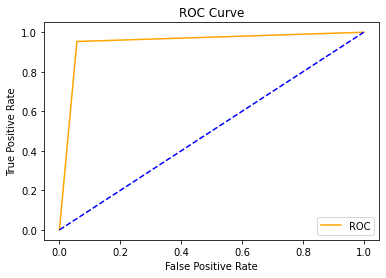

In [913]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Support vector Machine**

In [914]:
#instantiatiating the model
svm=SVC()

In [915]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=1)

In [916]:
#Training the data
svm.fit(x_train,y_train)

SVC()

In [917]:
#calling the function and passing the dataset for gradient boosting
metric_score(svm,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(svm,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:92.67%

=====Test Score=====
Accuracy Score:91.80%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1255
           1       0.88      0.92      0.90       855

    accuracy                           0.92      2110
   macro avg       0.91      0.92      0.92      2110
weighted avg       0.92      0.92      0.92      2110


 Confusion Matrix:
 [[1150  105]
 [  68  787]]

 F1 Score:
 0.9180094786729858


In [918]:
#Checking cross validation score
cv_score=cross_val_score(svm,x_new,y_new,cv=5).mean()
cv_score

0.8911137440758294

In [919]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [920]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.05737052 1.        ]
TPR [0.         0.95321637 1.        ]
Threshold [2 1 0]


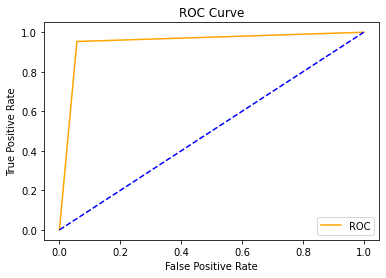

In [921]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Ada Boost Classifier**

In [922]:
#Initiating Ada boost classifier
ada=AdaBoostClassifier()

In [923]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=1)

In [924]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [925]:
#calling the function and passing the dataset for ada boost
metric_score(ada,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(ada,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:92.04%

=====Test Score=====
Accuracy Score:91.66%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1255
           1       0.89      0.91      0.90       855

    accuracy                           0.92      2110
   macro avg       0.91      0.92      0.91      2110
weighted avg       0.92      0.92      0.92      2110


 Confusion Matrix:
 [[1155  100]
 [  76  779]]

 F1 Score:
 0.9165876777251185


In [926]:
#Checking cross validation score
cv_score=cross_val_score(ada,x_new,y_new,cv=5).mean()
cv_score

0.8462085308056873

In [927]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [928]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.05737052 1.        ]
TPR [0.         0.95321637 1.        ]
Threshold [2 1 0]


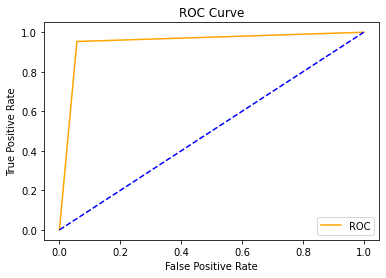

In [929]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**XGB**

In [930]:
#Instantiating the model
xgb=xgb.XGBClassifier()

In [931]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=1)

In [932]:
#Training the data
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [933]:
#calling the function and passing the dataset for logistic regression
metric_score(xgb,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(xgb,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:94.98%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1255
           1       0.93      0.94      0.94       855

    accuracy                           0.95      2110
   macro avg       0.95      0.95      0.95      2110
weighted avg       0.95      0.95      0.95      2110


 Confusion Matrix:
 [[1197   58]
 [  48  807]]

 F1 Score:
 0.9497630331753555


In [934]:
#Checking cross validation score
cv_score=cross_val_score(xgb,x_new,y_new,cv=5).mean()
cv_score

0.8485781990521328

In [935]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [936]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.05737052 1.        ]
TPR [0.         0.95321637 1.        ]
Threshold [2 1 0]


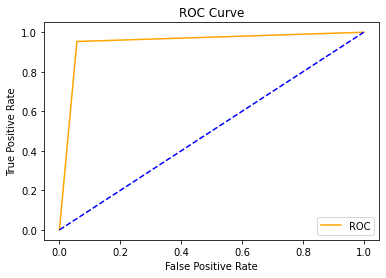

In [937]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [946]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Random Forest','SVM','Ada Boost','XGB'],
    'Training Score':[100,92.67,92.04,100],
    'Testing Score':[95.02,91.80,91.66,94.98],
    'Cross Val Score':[90.03,89.11,84.62,84.85],
    'F1 score':[95.02,91.80,91.65,94.97]
})
data

,Models,Training Score,Testing Score,Cross Val Score,F1 score
0,Random Forest,100.00,95.02,90.03,95.02
1,SVM,92.67,91.80,89.11,91.80
2,Ada Boost,92.04,91.66,84.62,91.65
3,XGB,100.00,94.98,84.85,94.97


**Observation**
* **So we can see that random forest and xgb has the highest training score meaning  they have seen most of the data that is 100 and also the testing score of random forest and xgb is almost same that is 95.02 and 94.98.**
* **But the cross validation score of xgb is 84.85 and of random forest is 90.03 which is much closer to the testing score.**
* **Difference between the cross validation score and testing score is also less and f1 score is also same as testing score for random forest.**
* **Because of this reasons i am going forward with Random Forest.**

In [947]:
#Using Grid Search cv for hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

In [948]:
param_grid=({
    'n_estimators': [100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4],
    'criterion' :['gini', 'entropy']
})

In [949]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=5)

In [950]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]})

In [951]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [952]:
#Training with the best parameters
rfc1=RandomForestClassifier(criterion='entropy',max_depth=4,max_features='sqrt',n_estimators=100)
rfc1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [953]:
#calling the function and passing the dataset
metric_score(rfc1,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rfc1,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:90.17%

=====Test Score=====
Accuracy Score:90.05%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1255
           1       0.85      0.92      0.88       855

    accuracy                           0.90      2110
   macro avg       0.89      0.90      0.90      2110
weighted avg       0.90      0.90      0.90      2110


 Confusion Matrix:
 [[1117  138]
 [  72  783]]

 F1 Score:
 0.9004739336492891


In [954]:
#Checking cross validation score
cv_score=cross_val_score(rfc1,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8838862559241706

**In this we can see that testing, training, cross validation and f1-score reduces, that is why i am selecting the model on which hyper parameter was not done.**

In [955]:
y_pred=rfc.predict(x_test)

In [956]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred)
roc_auc_score

0.9501526059504671

In [957]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('Rainfall prediction classification Project','wb'))

**Prediction for Rainfall**

* **As we have already done EDA so i wont be doing the eda part and visualization part.**

* **Further i will check for skewnees again and remove it by using power transform method.**

* **Again will check for outliers.**

* **Will check for multicollinearity and will take further steps.**

In [739]:
#loading dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [740]:
#checking overview of the dataset
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [741]:
#checking shape
data.shape

(8425, 23)

In [742]:
#dropping duplicates
data.drop_duplicates(inplace=True)
data.shape

(6762, 23)

In [743]:
#checking null values
data.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [744]:
#checking mean of minimum and max temperature when it is not raining
data_no=data.loc[data['RainTomorrow']=='No']
data_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [745]:
#checking mean of minimum and max temperature when it is raining
data_yes=data.loc[data['RainTomorrow']=='Yes']
data_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,2012-10-27,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,NW,4.0,22.0,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,NNW,13.0,9.0,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8377,2012-11-02,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,NNW,9.0,17.0,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,Yes
8380,2012-11-05,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,NNW,9.0,19.0,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes


In [746]:
#replacing the NaN valuesof all the columns which have null values in respect to the data of column rain tomorrow
data_no['MinTemp']=data['MinTemp'].fillna(data_no['MinTemp'].mode()[0])
data_yes['MinTemp']=data['MinTemp'].fillna(data_yes['MinTemp'].mode()[0])

data_no['MaxTemp']=data['MaxTemp'].fillna(data_no['MaxTemp'].mode()[0])
data_yes['MaxTemp']=data_yes['MaxTemp'].fillna(data_yes['MaxTemp'].mode()[0])

data_no['Rainfall']=data['Rainfall'].fillna(data_no['Rainfall'].median())
data_yes['Rainfall']=data_yes['Rainfall'].fillna(data_yes['Rainfall'].median())

data_no['Evaporation']=data['Evaporation'].fillna(data_no['Evaporation'].mode()[0])
data_yes['Evaporation']=data_yes['Evaporation'].fillna(data_yes['Evaporation'].mode()[0])

data_no['Sunshine']=data['Sunshine'].fillna(data_no['Sunshine'].mode()[0])
data_yes['Sunshine']=data_yes['Sunshine'].fillna(data_yes['Sunshine'].mode()[0])

data_no['WindGustDir']=data['WindGustDir'].fillna(data_no['WindGustDir'].mode()[0])
data_yes['WindGustDir']=data_yes['WindGustDir'].fillna(data_yes['WindGustDir'].mode()[0])

data_no['WindGustSpeed']=data['WindGustSpeed'].fillna(data_no['WindGustSpeed'].median())
data_yes['WindGustSpeed']=data_yes['WindGustSpeed'].fillna(data_yes['WindGustSpeed'].median())

data_no['WindDir9am']=data['WindDir9am'].fillna(data_no['WindDir9am'].mode()[0])
data_yes['WindDir9am']=data_yes['WindDir9am'].fillna(data_yes['WindDir9am'].mode()[0])

data_no['WindDir3pm']=data['WindDir3pm'].fillna(data_no['WindDir3pm'].mode()[0])
data_yes['WindDir3pm']=data_yes['WindDir3pm'].fillna(data_yes['WindDir3pm'].mode()[0])

data_no['WindSpeed9am']=data['WindSpeed9am'].fillna(data_no['WindSpeed9am'].median())
data_yes['WindSpeed9am']=data_yes['WindSpeed9am'].fillna(data_yes['WindSpeed9am'].median())

data_no['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data_no['WindSpeed3pm'].median())
data_yes['WindSpeed3pm']=data_yes['WindSpeed3pm'].fillna(data_yes['WindSpeed3pm'].median())

data_no['Humidity9am']=data['Humidity9am'].fillna(data_no['Humidity9am'].mode()[0])
data_yes['Humidity9am']=data_yes['Humidity9am'].fillna(data_yes['Humidity9am'].mode()[0])

data_no['Humidity3pm']=data['Humidity3pm'].fillna(data_no['Humidity3pm'].median())
data_yes['Humidity3pm']=data_yes['Humidity3pm'].fillna(data_yes['Humidity3pm'].median())

data_no['Pressure9am']=data['Pressure9am'].fillna(data_no['Pressure9am'].median())
data_yes['Pressure9am']=data_yes['Pressure9am'].fillna(data_yes['Pressure9am'].median())

data_no['Pressure3pm']=data['Pressure3pm'].fillna(data_no['Pressure3pm'].median())
data_yes['Pressure3pm']=data_yes['Pressure3pm'].fillna(data_yes['Pressure3pm'].median())

data_no['Cloud9am']=data['Cloud9am'].fillna(data_no['Cloud9am'].median())
data_yes['Cloud9am']=data_yes['Cloud9am'].fillna(data_yes['Cloud9am'].median())

data_no['Cloud3pm']=data['Cloud3pm'].fillna(data_no['Cloud3pm'].median())
data_yes['Cloud3pm']=data_yes['Cloud3pm'].fillna(data_yes['Cloud3pm'].median())

data_no['Temp9am']=data['Temp9am'].fillna(data_no['Temp9am'].mode()[0])
data_yes['Temp9am']=data_yes['Temp9am'].fillna(data_yes['Temp9am'].mode()[0])

data_no['Temp3pm']=data['Temp3pm'].fillna(data_no['Temp3pm'].mode()[0])
data_yes['Temp3pm']=data_yes['Temp3pm'].fillna(data_yes['Temp3pm'].mode()[0])

In [747]:
#transferring all the data into data1
df1= data_yes.append(data_no, ignore_index=True)
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2017-06-20,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,3.0,3.0,9.4,20.9,No,No
6620,2017-06-21,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,3.0,3.0,10.1,22.4,No,No
6621,2017-06-22,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,3.0,3.0,10.9,24.5,No,No
6622,2017-06-23,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,3.0,3.0,12.5,26.1,No,No


In [748]:
df1.isna().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday        66
RainTomorrow      0
dtype: int64

In [749]:
#dropping null values
df1.dropna(inplace=True)

In [750]:
#checking null values
df1.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [751]:
#converting date feature into datetime
df1['Date']=pd.to_datetime(df1['Date'])

In [752]:
df1['year']=df1['Date'].dt.year

In [753]:
df1['month']=df1['Date'].dt.month

In [754]:
df1['day']=df1['Date'].dt.day

In [755]:
#Dropping date column
df1=df1.drop(['Date'],axis=1)

In [756]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17


**So we can see that Date column have been dropped.**

In [757]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [758]:
#Encoding column
lab_enc=LabelEncoder()
df0=lab_enc.fit_transform(df1['Location'])
df2=lab_enc.fit_transform(df1['WindGustDir'])
df3=lab_enc.fit_transform(df1['WindDir9am'])
df4=lab_enc.fit_transform(df1['WindDir3pm'])
df5=lab_enc.fit_transform(df1['RainToday'])
df6=lab_enc.fit_transform(df1['RainTomorrow'])

In [759]:
#Transfering the data 
df1['Location']=df0
df1['WindGustDir']=df2
df1['WindDir9am']=df3
df1['WindDir3pm']=df4
df1['RainToday']=df5
df1['RainTomorrow']=df6

In [760]:
#Checking whether the data is encoded or not
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,9.7,31.9,0.0,2.6,0.0,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,0,1,2008,12,9
1,1,13.4,30.4,0.0,2.6,0.0,3,30.0,10,2,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,0,1,2008,12,11
2,1,15.9,21.7,2.2,2.6,0.0,5,31.0,4,1,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,1,1,2008,12,12
3,1,15.9,18.6,15.6,2.6,0.0,13,61.0,6,6,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,1,1,2008,12,13
4,1,14.1,20.9,0.0,2.6,0.0,1,22.0,11,0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,0,1,2008,12,17


**So we can see that categorical columns have been encoded.**

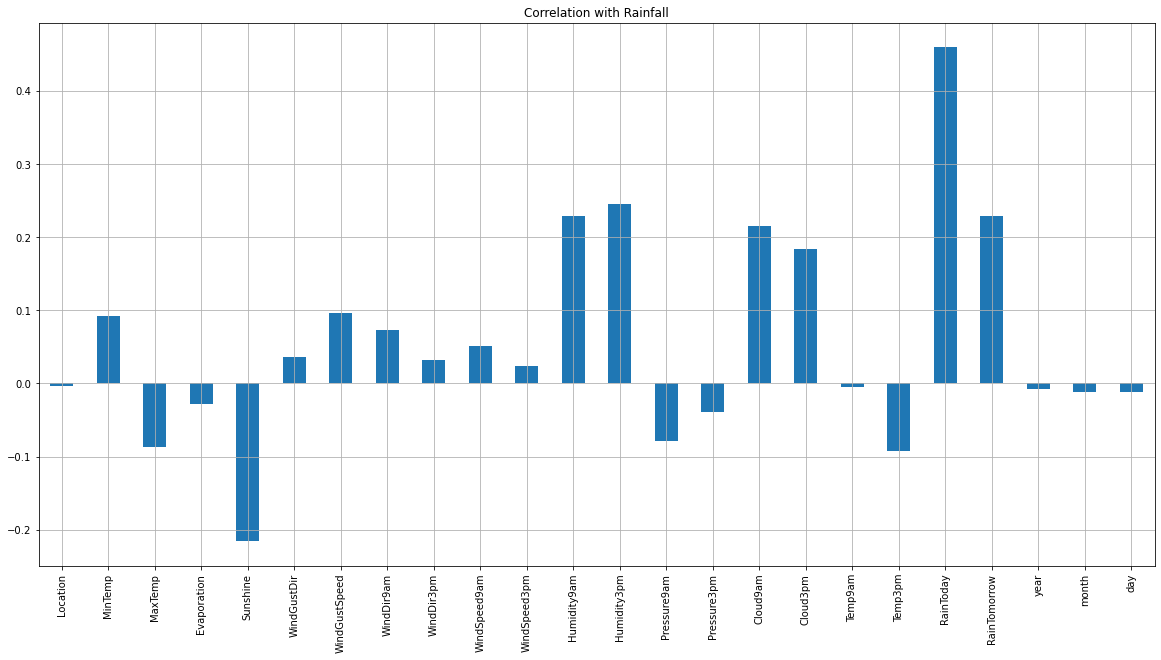

In [761]:
#Checking for correlation
df1.drop(['Rainfall'],axis=1).corrwith(df1['Rainfall']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Rainfall')
plt.show()

**In this we can see that column rain today is highly correlated with the label and location and temp9am are least correalted.**

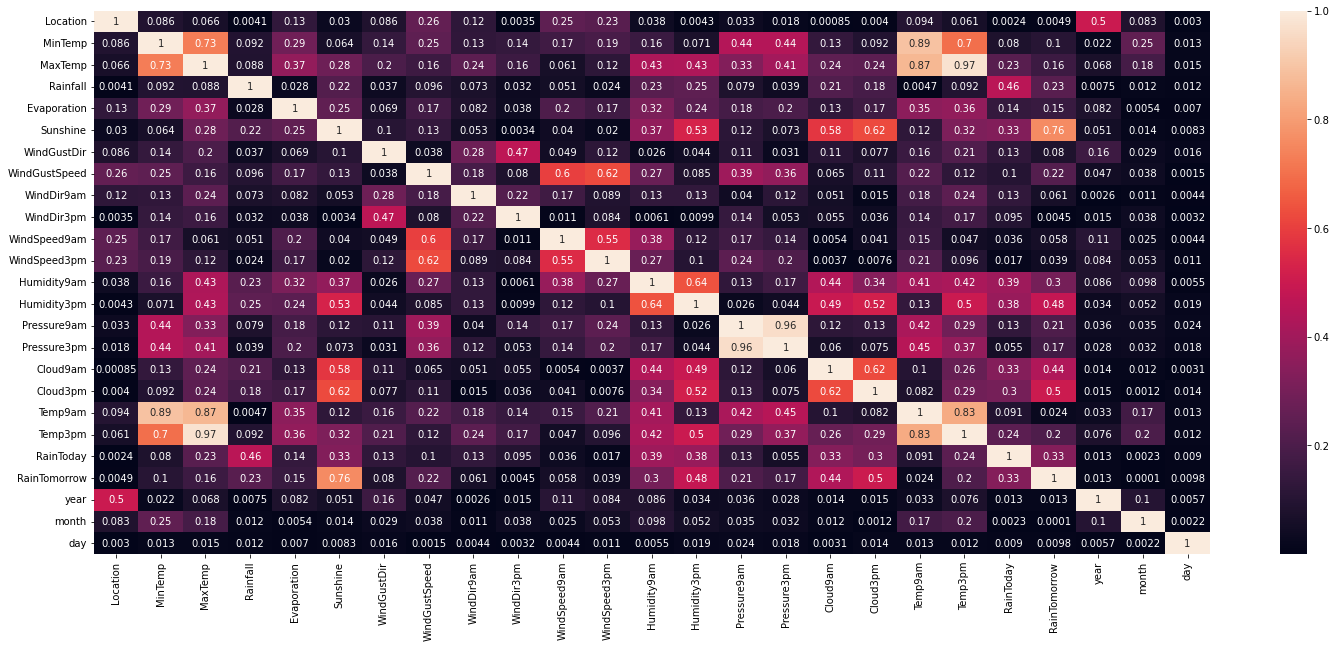

In [762]:
#Plotting heatmap
corr=df1.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**

* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **In this we can see that mintemp is multicorrelated to the temp9am.**
* **Maxtemp is multicorrealted with temp3pm and temp9am.**
* **Sunshin is multicorrelated with rain tomorrow.**
* **pressure9am is multicorrelated with pressure3pm.**
* **temp9am is multicorrelated with temp3pm.**
* **In classificatiom model, i have plotted the scatter plot fot the above multicorrelated columns except sunshin vs rain tomorrow.**
* **So rest all columns i wont plot as i already know that they are showing positive relationship/trend.so i will cross verify that by using vif method.**

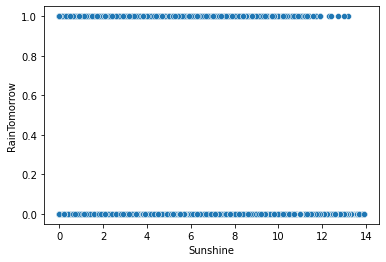

In [763]:
#plotting scatterplot
sns.scatterplot(x='Sunshine',y='RainTomorrow',data=df1)
plt.show()

**In this plot we cant see any positive relationship/trend.so i think there is no multicollinearity problem bretween the two.**

In [764]:
data3=df1[[
'MinTemp',
'MaxTemp',
'Evaporation',
'Sunshine',
'WindGustSpeed',
'WindSpeed9am',
'WindSpeed3pm',
'Humidity9am',
'Humidity3pm',
'Pressure9am',
'Pressure3pm',
'Cloud9am',
'Cloud3pm',
'Temp9am',
'Temp3pm',
'year',
'month',
'day']]

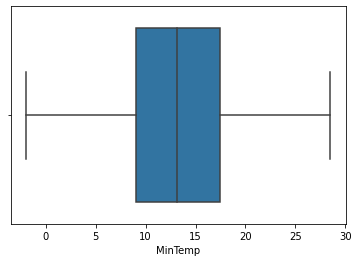

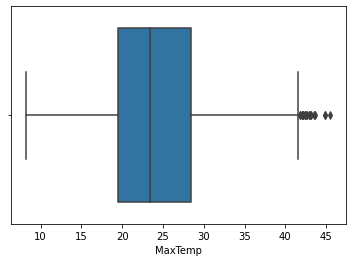

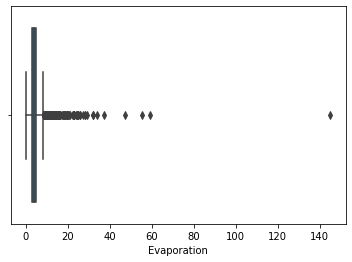

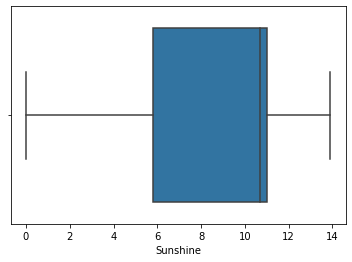

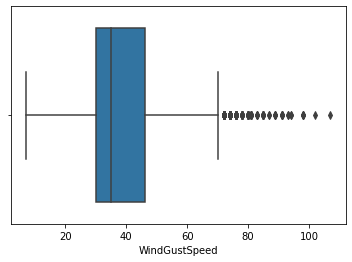

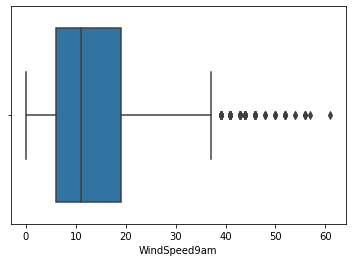

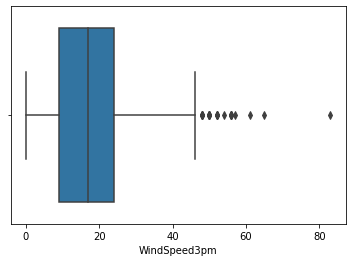

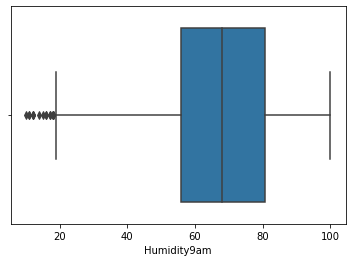

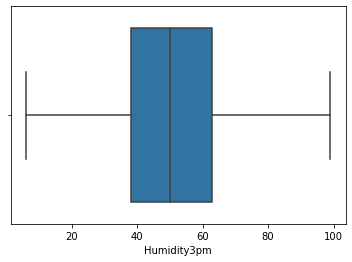

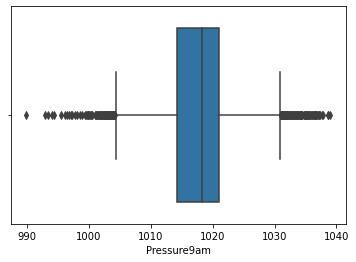

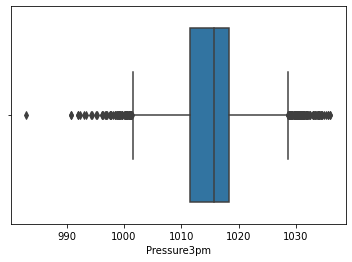

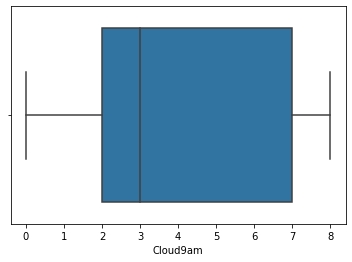

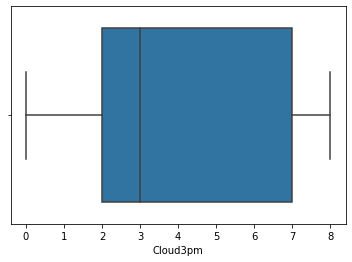

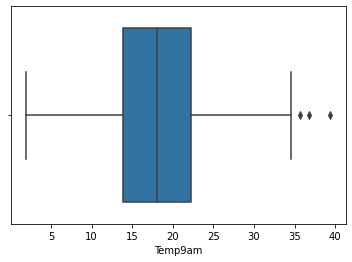

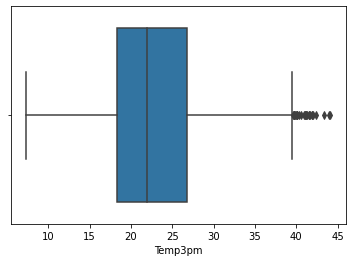

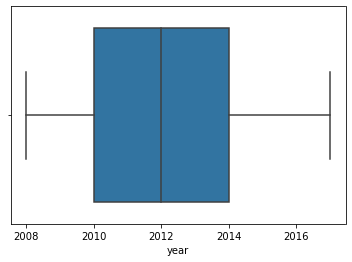

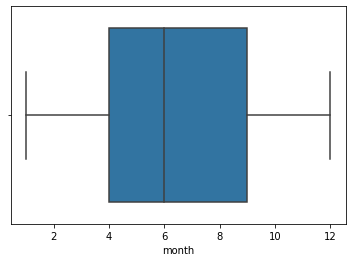

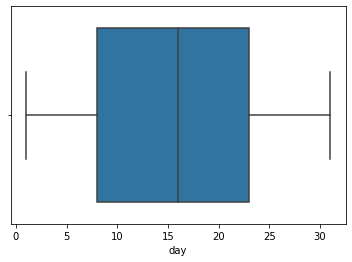

In [765]:
#checking for outliers
for i in data3:
    if data3[i].dtype!='object':
        sns.boxplot(data3[i],data=df1)
        plt.show()

**In the above plots we can see that in columns max temp,Evaporation,Windgustspeed,windspeed9am,windspeed3pm,humidity9am,pressure9am,pressure3pm,temp9am and temp3pm outliers are present.so using z-score method to remove the outliers.**

In [766]:
#Importing required libraries
from scipy.stats import zscore

In [767]:
#Removing outliers
z_score=zscore(df1[['MaxTemp','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [768]:
df1[z].shape

(6299, 25)

In [769]:
df1.shape

(6558, 25)

In [770]:
df1=df1[z]

In [771]:
#Percentage Loss of Data
data_loss=((6558-6299)/6558)*100
print(f'Data Loss:{data_loss} %')

Data Loss:3.9493748093931074 %


In [772]:
#checking skewness for continuous columns
df1.skew()

Location          0.009375
MinTemp          -0.074576
MaxTemp           0.284075
Rainfall         14.106922
Evaporation       1.390514
Sunshine         -1.019201
WindGustDir       0.111041
WindGustSpeed     0.554658
WindDir9am       -0.175227
WindDir3pm       -0.125366
WindSpeed9am      0.681492
WindSpeed3pm      0.347749
Humidity9am      -0.238439
Humidity3pm       0.160221
Pressure9am       0.071835
Pressure3pm       0.100929
Cloud9am          0.042966
Cloud3pm          0.118771
Temp9am          -0.070285
Temp3pm           0.313239
RainToday         1.235032
RainTomorrow      1.281103
year              0.356386
month             0.040840
day               0.003258
dtype: float64

**In this we can see that in columns rainfall,evaporation,sunshine,windgustspeed and WindSpeed9am skewness is present.so using power transform method remove the skewness.And rest of the columns who have value more than 0.5 are categorical data columns and we dont treat skewness of categorical data columns and label.**

In [773]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [774]:
df1[['Sunshine','Evaporation','WindGustSpeed','WindSpeed9am']]=power_transform(df1[['Sunshine','Evaporation','WindGustSpeed','WindSpeed9am']],method='yeo-johnson')
df1[['Sunshine','Evaporation','WindGustSpeed','WindSpeed9am']]

,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am
1,-1.799734,-0.802718,-0.574193,0.655820
2,-1.799734,-0.802718,-0.483688,0.475465
4,-1.799734,-0.802718,-1.365179,0.075935
5,-1.799734,-0.802718,1.848747,-0.537893
6,-1.799734,-0.802718,0.720340,0.826118
...,...,...,...,...
6619,0.688099,-0.001828,-0.483688,0.475465
6620,0.688099,-0.001828,-0.483688,0.283077
6621,0.688099,-0.001828,-1.365179,0.283077
6622,0.688099,-0.001828,0.029111,-0.149888


In [775]:
#checking skewness
df1.skew()

Location          0.009375
MinTemp          -0.074576
MaxTemp           0.284075
Rainfall         14.106922
Evaporation       0.007611
Sunshine         -0.808711
WindGustDir       0.111041
WindGustSpeed     0.005156
WindDir9am       -0.175227
WindDir3pm       -0.125366
WindSpeed9am     -0.133268
WindSpeed3pm      0.347749
Humidity9am      -0.238439
Humidity3pm       0.160221
Pressure9am       0.071835
Pressure3pm       0.100929
Cloud9am          0.042966
Cloud3pm          0.118771
Temp9am          -0.070285
Temp3pm           0.313239
RainToday         1.235032
RainTomorrow      1.281103
year              0.356386
month             0.040840
day               0.003258
dtype: float64

In [776]:
#Dividing dataset into features and label
#Features
x=df1.drop(['Rainfall'],axis=1)
#Label
y=df1['Rainfall']

In [777]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-1.38569481,  0.06940245,  1.06302214, ..., -1.76448915,
         1.678012  , -0.53617197],
       [-1.38569481,  0.51936544, -0.38422423, ..., -1.76448915,
         1.678012  , -0.42254457],
       [-1.38569481,  0.19539209, -0.51730436, ..., -1.76448915,
         1.678012  ,  0.14559244],
       ...,
       [ 1.20975319, -1.69445247,  0.21463633, ...,  2.17651843,
        -0.12212384,  0.71372944],
       [ 1.20975319, -1.37047911,  0.48079659, ...,  2.17651843,
        -0.12212384,  0.82735685],
       [ 1.20975319, -0.93851464,  0.4974316 , ...,  2.17651843,
        -0.12212384,  0.94098425]])

In [778]:
x_scaler.shape

(6299, 24)

In [779]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [780]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.649707,Location
1,9.418196,MinTemp
2,25.884520,MaxTemp
3,1.757661,Evaporation
4,3.653277,Sunshine
5,1.520939,WindGustDir
6,2.302154,WindGustSpeed
7,1.305464,WindDir9am
8,1.451100,WindDir3pm
9,2.040103,WindSpeed9am


**So we can see that max temp,pressure9am,pressure3pm,temp9am,temp3pm are highly multicorrelated.so dropping this columns**

In [781]:
#dropping column max temp,pressure9am,pressure3pm,temp9am,temp3pm 
x=df1.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'],axis=1)
x

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
1,1,13.4,-0.802718,-1.799734,3,-0.574193,10,2,0.655820,6.0,48.0,22.0,7.0,7.0,0,1,2008,12,11
2,1,15.9,-0.802718,-1.799734,5,-0.483688,4,1,0.475465,13.0,89.0,91.0,8.0,8.0,1,1,2008,12,12
4,1,14.1,-0.802718,-1.799734,1,-1.365179,11,0,0.075935,9.0,69.0,82.0,8.0,1.0,0,1,2008,12,17
5,1,13.5,-0.802718,-1.799734,13,1.848747,3,14,-0.537893,20.0,80.0,65.0,8.0,1.0,1,1,2008,12,18
6,1,19.7,-0.802718,-1.799734,14,0.720340,7,15,0.826118,30.0,49.0,22.0,7.0,7.0,0,1,2008,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9,3.5,-0.001828,0.688099,0,-0.483688,2,0,0.475465,13.0,59.0,27.0,3.0,3.0,0,0,2017,6,20
6620,9,2.8,-0.001828,0.688099,0,-0.483688,9,1,0.283077,11.0,51.0,24.0,3.0,3.0,0,0,2017,6,21
6621,9,3.6,-0.001828,0.688099,6,-1.365179,9,3,0.283077,9.0,56.0,21.0,3.0,3.0,0,0,2017,6,22
6622,9,5.4,-0.001828,0.688099,3,0.029111,9,14,-0.149888,9.0,53.0,24.0,3.0,3.0,0,0,2017,6,23


In [782]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-1.38569481e+00,  6.94024514e-02, -8.02718403e-01, ...,
        -1.76448915e+00,  1.67801200e+00, -5.36171972e-01],
       [-1.38569481e+00,  5.19365440e-01, -8.02718403e-01, ...,
        -1.76448915e+00,  1.67801200e+00, -4.22544571e-01],
       [-1.38569481e+00,  1.95392088e-01, -8.02718403e-01, ...,
        -1.76448915e+00,  1.67801200e+00,  1.45592436e-01],
       ...,
       [ 1.20975319e+00, -1.69445247e+00, -1.82754229e-03, ...,
         2.17651843e+00, -1.22123836e-01,  7.13729444e-01],
       [ 1.20975319e+00, -1.37047911e+00, -1.82754229e-03, ...,
         2.17651843e+00, -1.22123836e-01,  8.27356845e-01],
       [ 1.20975319e+00, -9.38514644e-01, -1.82754229e-03, ...,
         2.17651843e+00, -1.22123836e-01,  9.40984247e-01]])

In [783]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [784]:
best_features=SelectKBest(score_func=f_classif,k=16)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(16,'Score'))

     Feature_Name     Score
14      RainToday       inf
10    Humidity9am  7.492543
11    Humidity3pm  7.222078
15   RainTomorrow  5.815136
3        Sunshine  5.668035
12       Cloud9am  5.079726
13       Cloud3pm  4.174522
2     Evaporation  3.058925
4     WindGustDir  1.628400
6      WindDir9am  1.530883
9    WindSpeed3pm  1.511927
5   WindGustSpeed  1.484667
16           year  1.358660
8    WindSpeed9am  1.280895
1         MinTemp  1.145264
7      WindDir3pm  1.141561


In [785]:
new_feature=df1[['RainToday','Humidity9am','Humidity3pm','RainTomorrow','Sunshine','Cloud9am','Cloud3pm','Evaporation','WindGustDir','WindDir9am','WindGustSpeed','WindSpeed3pm','WindSpeed9am','year','MinTemp','WindDir3pm']]
new_feature

,RainToday,Humidity9am,Humidity3pm,RainTomorrow,Sunshine,Cloud9am,Cloud3pm,Evaporation,WindGustDir,WindDir9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am,year,MinTemp,WindDir3pm
1,0,48.0,22.0,1,-1.799734,7.0,7.0,-0.802718,3,10,-0.574193,6.0,0.655820,2008,13.4,2
2,1,89.0,91.0,1,-1.799734,8.0,8.0,-0.802718,5,4,-0.483688,13.0,0.475465,2008,15.9,1
4,0,69.0,82.0,1,-1.799734,8.0,1.0,-0.802718,1,11,-1.365179,9.0,0.075935,2008,14.1,0
5,1,80.0,65.0,1,-1.799734,8.0,1.0,-0.802718,13,3,1.848747,20.0,-0.537893,2008,13.5,14
6,0,49.0,22.0,1,-1.799734,7.0,7.0,-0.802718,14,7,0.720340,30.0,0.826118,2008,19.7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,0,59.0,27.0,0,0.688099,3.0,3.0,-0.001828,0,2,-0.483688,13.0,0.475465,2017,3.5,0
6620,0,51.0,24.0,0,0.688099,3.0,3.0,-0.001828,0,9,-0.483688,11.0,0.283077,2017,2.8,1
6621,0,56.0,21.0,0,0.688099,3.0,3.0,-0.001828,6,9,-1.365179,9.0,0.283077,2017,3.6,3
6622,0,53.0,24.0,0,0.688099,3.0,3.0,-0.001828,3,9,0.029111,9.0,-0.149888,2017,5.4,14


In [786]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(new_feature)
x_scaler

array([[-0.55785213, -1.16202111, -1.55550023, ..., -1.76448915,
         0.06940245, -1.30532966],
       [ 1.79258973,  1.24135536,  2.1962471 , ..., -1.76448915,
         0.51936544, -1.52861533],
       [-0.55785213,  0.06897659,  1.70688875, ..., -1.76448915,
         0.19539209, -1.751901  ],
       ...,
       [-0.55785213, -0.6930696 , -1.60987338, ...,  2.17651843,
        -1.69445247, -1.08204399],
       [-0.55785213, -0.86892642, -1.44675393, ...,  2.17651843,
        -1.37047911,  1.37409839],
       [-0.55785213, -0.98616429, -1.44675393, ...,  2.17651843,
        -0.93851464, -1.08204399]])

In [787]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Xtreme Gradient Regressor**

In [788]:
#instantiating model
xgb=xgb.XGBRegressor()

In [789]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    xgb.fit(x_train,y_train)
    pred=xgb.predict(x_train)
    y_pred=xgb.predict(x_test)
    print(f'at random state {i}, training accuracy is {metrics.r2_score(y_train,pred)*100}')
    print(f'at random state {i}, testing accuracy is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

at random state 0, training accuracy is 99.36042017722784
at random state 0, testing accuracy is 7.218053100158517


at random state 1, training accuracy is 99.1654691570588
at random state 1, testing accuracy is 17.421352575442683


at random state 2, training accuracy is 99.19066328201603
at random state 2, testing accuracy is -21.272069755039126


at random state 3, training accuracy is 99.29012569615857
at random state 3, testing accuracy is 5.416961388243147


at random state 4, training accuracy is 98.97212529951435
at random state 4, testing accuracy is 16.403368848608856


at random state 5, training accuracy is 99.09755470074776
at random state 5, testing accuracy is -109.04019264589041


at random state 6, training accuracy is 99.27823062134321
at random state 6, testing accuracy is 15.835220566638231


at random state 7, training accuracy is 99.40801024135334
at random state 7, testing accuracy is 14.660328211074635


at random state 8, training accuracy is 99.19820513714848

**Taking random state=145**

In [790]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=145)

In [791]:
#Training the Model
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [792]:
pred=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [793]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.14838155763971

 Testing Score: 31.32572706374237


In [794]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [795]:
#Checking cross validation score for Gradient Boosting
for j in range(2,6):
    cv_score=cross_val_score(xgb,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is -0.12979961046077548and accuracy for the testing is 0.3132572706374237


at cross fold 3 the cv score is -0.040092980917795264and accuracy for the testing is 0.3132572706374237


at cross fold 4 the cv score is -0.004403509225721192and accuracy for the testing is 0.3132572706374237


at cross fold 5 the cv score is -0.09833259984936911and accuracy for the testing is 0.3132572706374237




**Taking cv=2**

In [796]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

2.4306917572569637

In [797]:
#mean squared error
mean_squared_error(y_test,y_pred)

49.46657365494175

In [798]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

7.03324773166293

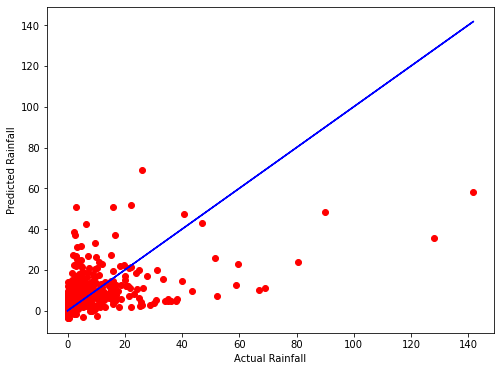

In [799]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Rainfall',fontsize=10)
plt.ylabel('Predicted Rainfall',fontsize=10)
plt.show()

**Gradient Boosting**

In [800]:
gb=GradientBoostingRegressor()

In [801]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=145)

In [802]:
#Training the Model
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [803]:
pred=gb.predict(x_train)
y_pred=gb.predict(x_test)

In [804]:
#Printing Training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 53.16416289560906

 Testing score: 28.83675134470827


In [805]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [806]:
#Checking cross validation score for XGBoost
cv_score=cross_val_score(gb,x_scaler,y,cv=2).mean()
cv_score

0.056987989248058424

In [807]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

2.2679028166703925

In [808]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

51.259400800636335

In [809]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

7.1595670819286505

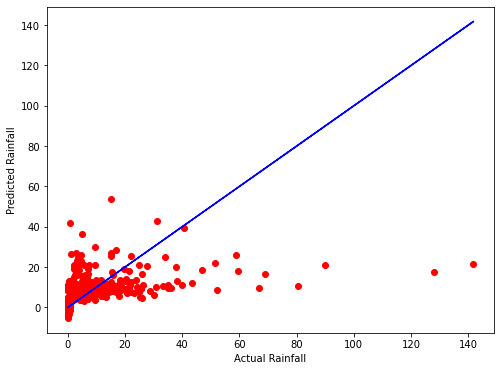

In [810]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Rainfall',fontsize=10)
plt.ylabel('Predicted Rainfall',fontsize=10)
plt.show()

**Ada Boost**

In [811]:
#Instantiating Ada Boost Regressor
ada=AdaBoostRegressor()

In [812]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=145)

In [813]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [814]:
pred=ada.predict(x_train)
y_pred=ada.predict(x_test)

In [815]:
#Printing Training and Testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 12.94345026254492

 Testing Score: -50.01329739609157


In [816]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [817]:
#Checking cross validation score for XGBoost
cv_score=cross_val_score(ada,x_scaler,y,cv=2).mean()
cv_score

-1.1206268238859611

In [818]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

8.286637757904344

In [819]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

108.05565909306631

In [820]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

10.39498239984399

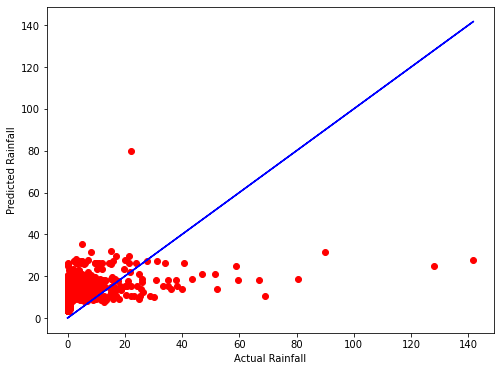

In [821]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Rainfall',fontsize=10)
plt.ylabel('Predicted Rainfall',fontsize=10)
plt.show()

**Random Forest Classifier**

In [822]:
#Instantiating XGBoost
rf=RandomForestRegressor()

In [823]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=145)

In [824]:
#Training data
rf.fit(x_train,y_train)

RandomForestRegressor()

In [825]:
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [826]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 87.45528354917917

 Testing Score: 19.39586007515245


In [827]:
#Checking cross validation score for XGBoost
cv_score=cross_val_score(rf,x_scaler,y,cv=2).mean()
cv_score

0.015553049602040403

In [828]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

2.2301452738725116

In [829]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

58.059742812079975

In [830]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

7.6196944041135914

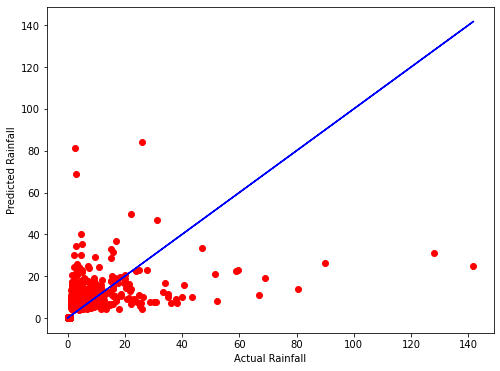

In [831]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Rainfall',fontsize=10)
plt.ylabel('Predicted Rainfall',fontsize=10)
plt.show()

In [832]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['XGBoost','Gradient Boosting','Ada Boost','Random forest'],
    'Training Score':[99.14,53.16,11.65,87.02],
    'Testing Score':[31.33,-54.94,28.53,19.39],
})
data

,Models,Training Score,Testing Score
0,XGBoost,99.14,31.33
1,Gradient Boosting,53.16,-54.94
2,Ada Boost,11.65,28.53
3,Random forest,87.02,19.39


**Observation**
* **In this we can see that xgb and random forest have the seen most of the data that is training score 99% and 87% each but testing score of xgb is higher than xgb that is 31.33 and 15.79.**
* **Because of this i am going forward with Random Forest.**

In [699]:
#Using Grid Search cv for hyperparameter tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV

In [700]:
param_grid=({
    'n_estimators': [100,200],
    'max_depth' : [2,3,4],
    'eta':[0.3,0.1,0.01],
    'subsample':[0.1,0.2,0.3],
    'colsample_bytree' :[0.4,0.5,0.6]
})

In [701]:
grid_search=GridSearchCV(xgb,param_grid=param_grid,cv=5)

In [702]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...ot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'eta': [0.3, 0.1, 0.01], 'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200],
                         'subsample': [0.1, 0.2, 0.3]})

In [703]:
#best Parameters
grid_search.best_params_ 

{'colsample_bytree': 0.4,
 'eta': 0.3,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.3}

In [706]:
#Training with the best parameters
xgb1=xgb.XGBRegressor(colsample_bytree=0.4,eta=0.3,max_depth=2,n_estimators=100,subsample=0.3)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [707]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 87.02117852162839

 Testing Score: 15.795989001158727


In [708]:
#Checking cross validation score for XGBoost
cv_score=cross_val_score(xgb1,x_scaler,y,cv=2).mean()
cv_score

-0.29955798281426715

**So we can see that training and testing score reduced .Hence i will save the mmodel on which hyper parameter tuning was not done.**

In [709]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

2.2554541912320483

In [710]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

60.65275588693683

In [711]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

7.7879879228807765

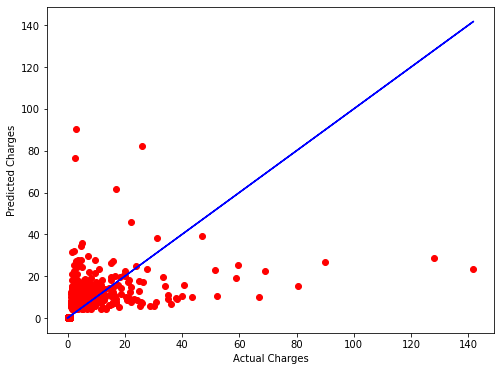

In [712]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

In [719]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(xgb,open('Rainfall Prediction Regression Project','wb'))